#Preparing the data
* Importing libraries
* Getting mutations profile - original + normalized

In [48]:
#import libraries

import scipy.io as sio
import numpy as np
import math
import pandas as pd
from google.colab import files
import csv
import random
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import itertools
from scipy.stats import gmean
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.colors as mcolors


In [2]:
#read the profiles

control_path = '/content/drive/MyDrive/RT_signatures/crispr_control_all_upd.SBS96.all' # path for control profile
exp_path = '/content/drive/MyDrive/RT_signatures/crispr_exp_all_upd.SBS96.all' # path for exp profile
control_norm_path = '/content/drive/MyDrive/RT_signatures/crispr_control_all_norm_2.SBS96.all' # path for control normalized profile
exp_norm_path = '/content/drive/MyDrive/RT_signatures/crispr_exp_all_norm_2.SBS96.all' # path for exp normalized profile

control = pd.read_csv(control_path, sep='\t') # original control
exp = pd.read_csv(exp_path, sep='\t') # original exp
control_norm = pd.read_csv(control_norm_path, sep='\t') # normalized control
exp_norm = pd.read_csv(exp_norm_path, sep='\t') # normalized exp
print(control.head(), '\n', control_norm.head(), '\n\n\n', exp.head(), '\n', exp_norm.head())

  MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0      A[C>A]A           12           25           18           23   
1      A[C>A]C            2            2            1            5   
2      A[C>A]G            0            1            2            3   
3      A[C>A]T            1            4            2            7   
4      A[C>G]A            0            1            1            2   

   ATP2B4_5_s4  ATP2B4_5_s5  ATP2B4_5_s6  ATP2B4_5_s8  
0            9           15           13           24  
1            0            1            1            2  
2            1            0            1            0  
3            7            6            5            3  
4            0            0            0            2   
   MutationType  ATP2B4_2_s3  ATP2B4_2_s4  ATP2B4_2_s5  ATP2B4_2_s7  \
0      A[C>A]A     1.974904     1.811288     1.782134     1.656725   
1      A[C>A]C     0.568719     0.250369     0.171069     0.622293   
2      A[C>A]G     0.000000    

In [3]:
#create list of control original data
control_columns = []
for column in control.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_columns.append(control[column].tolist())
print(len(control_columns), control_columns)

#create list of control normalized data
control_norm_columns = []
for column in control_norm.columns[1:]:  # from column 2 (ignore the mutation types column)
    control_norm_columns.append(control_norm[column].tolist())
print(len(control_norm_columns), control_norm_columns)

8 [[12, 2, 0, 1, 0, 0, 0, 0, 6, 2, 3, 3, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 0, 0, 1, 1, 5, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 21, 1, 2, 9, 0, 0, 0, 0, 2, 5, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 1, 25, 0, 0, 0, 1, 3, 3, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0], [25, 2, 1, 4, 1, 0, 0, 0, 8, 0, 7, 3, 1, 0, 0, 2, 2, 1, 3, 2, 1, 0, 1, 1, 21, 1, 1, 12, 1, 0, 1, 0, 7, 1, 4, 4, 1, 0, 1, 1, 2, 0, 1, 4, 1, 0, 0, 1, 61, 4, 2, 18, 0, 0, 1, 1, 2, 3, 6, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 26, 7, 0, 37, 0, 0, 0, 1, 4, 3, 3, 3, 4, 2, 1, 3, 3, 0, 4, 4, 2, 0, 1, 2], [18, 1, 2, 2, 1, 0, 0, 0, 3, 3, 2, 3, 0, 0, 0, 0, 0, 0, 1, 3, 2, 1, 1, 1, 16, 3, 1, 7, 0, 0, 0, 0, 5, 4, 4, 4, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 45, 2, 0, 16, 0, 0, 0, 3, 4, 3, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 14, 6, 0, 21, 0, 1, 0, 3, 6, 4, 4, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 1, 3], [23, 5, 3, 7, 2, 0, 2, 0, 8, 1, 3, 2, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 15, 1, 2, 10, 0, 1, 1, 1, 11, 4, 2, 3

In [4]:
#create list of exp original data
exp_columns = []
for column in exp.columns[1:]: # from column 2 (ignore the mutation types column)
  exp_columns.append(exp[column].tolist())
print(len(exp_columns), exp_columns)

#create list of exp normalized  data
exp_norm_columns = []
for column in exp_norm.columns[1:]: # from column 2 (ignore the mutation types column)
  exp_norm_columns.append(exp_norm[column].tolist())
print(len(exp_norm_columns), exp_norm_columns)

165 [[14, 1, 1, 4, 1, 0, 0, 1, 5, 2, 4, 3, 0, 2, 0, 4, 1, 0, 3, 1, 0, 2, 0, 1, 12, 0, 1, 2, 0, 1, 0, 0, 4, 3, 4, 2, 1, 2, 0, 1, 1, 0, 1, 3, 0, 2, 0, 2, 45, 2, 2, 14, 2, 2, 1, 1, 3, 0, 2, 3, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 19, 4, 0, 35, 0, 2, 1, 3, 7, 3, 2, 4, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1], [14, 0, 2, 10, 1, 0, 0, 0, 7, 1, 0, 3, 2, 1, 1, 2, 3, 1, 1, 4, 0, 0, 0, 0, 9, 0, 0, 1, 2, 1, 0, 3, 2, 8, 3, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 36, 1, 1, 10, 1, 1, 0, 0, 5, 2, 4, 1, 0, 1, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 20, 7, 1, 28, 2, 0, 1, 1, 4, 6, 2, 2, 1, 0, 0, 1, 3, 0, 1, 4, 1, 0, 1, 2], [33, 1, 2, 9, 1, 0, 0, 1, 6, 0, 2, 4, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 10, 4, 3, 9, 0, 2, 0, 1, 3, 7, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 51, 6, 1, 15, 1, 2, 0, 0, 3, 2, 3, 4, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 22, 10, 3, 55, 2, 1, 0, 1, 4, 1, 3, 2, 4, 0, 2, 1, 7, 0, 1, 3, 0, 0, 0, 1], [17, 2, 0, 7, 2, 0, 1, 1, 4, 3, 2, 1, 1, 0, 1, 5, 0, 0, 3, 0, 0, 0, 0, 0, 5, 2, 1, 2, 0, 0, 0, 1, 5, 4, 2,

In [5]:
# get the full samples sames (with the replicates identifier)
exp_names_full = exp.columns[1:].tolist()
print(type(exp_names_full), exp_names_full)

<class 'list'> ['ATM_148_s1', 'ATM_148_s2', 'ATM_16_s1', 'ATM_16_s2', 'C1orf86_136_s1', 'C1orf86_136_s2', 'C1orf86_139_s1', 'C1orf86_139_s2', 'C9orf142_113_s1', 'C9orf142_113_s2', 'C9orf142_129_s1', 'C9orf142_129_s2', 'DCLRE1A_41_s2', 'DCLRE1A_41_s4', 'DCLRE1A_42_s2', 'DCLRE1A_42_s4', 'EXO1_71_s2', 'EXO1_71_s3', 'EXO1_71_s4', 'FAN1_122_s1', 'FAN1_122_s2', 'FAN1_19_s1', 'FAN1_19_s2', 'FANCM_10_s1', 'FANCM_10_s2', 'FANCM_140_s1', 'FANCM_140_s2', 'MDC1_126_s1', 'MDC1_126_s2', 'MDC1_126_s3', 'MDC1_126_s4', 'MLH1_172_s1', 'MLH1_172_s2', 'MLH1_173_s1', 'MLH1_173_s2', 'MSH2_120_s1', 'MSH2_120_s2', 'MSH2_120_s3', 'MSH6_3_s4', 'MSH6_3_s5', 'MSH6_3_s6', 'MSH6_3_s8', 'MSH6_4_s2', 'MSH6_4_s3', 'MSH6_4_s4', 'MSH6_4_s7', 'NBN_62_s3', 'NBN_62_s4', 'NHEJ1_65_s1', 'NHEJ1_65_s2', 'NHEJ1_9_s1', 'NHEJ1_9_s2', 'OGG1_106_s1', 'OGG1_106_s2', 'OGG1_25_s1', 'OGG1_25_s2', 'PARP1_128_s1', 'PARP1_128_s2', 'PARP1_18_s2', 'PARP2_137_s1', 'PARP2_137_s2', 'PARP2_96_s1', 'PARP2_96_s2', 'PIAS1_13_s1', 'PIAS1_13_s2', 'P

In [6]:
#get only the prefix of the samples names (without the replicate identifier)
exp_names_cut = []
for i in exp.columns[1:]:
  exp_names_cut.append(i.split("_")[0])
print(len(exp_names_cut), exp_names_cut)
print(sorted(set(exp_names_cut)))

165 ['ATM', 'ATM', 'ATM', 'ATM', 'C1orf86', 'C1orf86', 'C1orf86', 'C1orf86', 'C9orf142', 'C9orf142', 'C9orf142', 'C9orf142', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'EXO1', 'EXO1', 'EXO1', 'FAN1', 'FAN1', 'FAN1', 'FAN1', 'FANCM', 'FANCM', 'FANCM', 'FANCM', 'MDC1', 'MDC1', 'MDC1', 'MDC1', 'MLH1', 'MLH1', 'MLH1', 'MLH1', 'MSH2', 'MSH2', 'MSH2', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'NBN', 'NBN', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'OGG1', 'OGG1', 'OGG1', 'OGG1', 'PARP1', 'PARP1', 'PARP1', 'PARP2', 'PARP2', 'PARP2', 'PARP2', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS4', 'PIAS4', 'PIAS4', 'PIAS4', 'PIF1', 'PIF1', 'PIF1', 'PIF1', 'PMS1', 'PMS1', 'PMS1', 'PMS1', 'PMS2', 'PMS2', 'PMS2', 'PMS2', 'POLB', 'POLB', 'POLB', 'POLB', 'POLE3', 'POLE3', 'POLE3', 'POLE3', 'POLE4', 'POLE4', 'POLE4', 'POLE4', 'POLI', 'POLI', 'POLI', 'POLI', 'POLM', 'POLM', 'POLM', 'POLM', 'POLN', 'POLN', 'POLN', 'POLN', 'POLQ', 'POLQ', 'POLQ', 'POLQ', 'PRIMPOL', 'PRIMPOL', 'PRIMPOL', 'PRIMPOL'

#RT division
* Getting mutations profiles divided to 2 RT regions (ERR & LRR) - original + normalized

In [13]:
#read the original profiles
control_early_p = '/content/drive/MyDrive/RT_signatures/crispr_control_early_upd.SBS96.all' # path for early control profile
control_late_p = '/content/drive/MyDrive/RT_signatures/crispr_control_late_upd_title.SBS96.all' # path for late control profile
exp_early_p = '/content/drive/MyDrive/RT_signatures/crispr_exp_early_upd.SBS96.all' # path for early exp profile
exp_late_p = '/content/drive/MyDrive/RT_signatures/crispr_exp_late_upd_title.SBS96.all' # path for late exp profile

#read the normalized profiles
control_early_norm_p = '/content/drive/MyDrive/RT_signatures/crispr_control_early_norm_2.SBS96.all' # path for early control normalized profile
control_late_norm_p = '/content/drive/MyDrive/RT_signatures/crispr_control_late_norm_2.SBS96.all' # path for late control normalized profile
exp_early_norm_p = '/content/drive/MyDrive/RT_signatures/crispr_exp_early_norm_2.SBS96.all' # path for early exp normalized profile
exp_late_norm_p = '/content/drive/MyDrive/RT_signatures/crispr_exp_late_norm_2.SBS96.all' # path for late exp normalized profile

control_e = pd.read_csv(control_early_p, sep='\t') # original early control
control_l = pd.read_csv(control_late_p, sep='\t') # original late control
exp_e = pd.read_csv(exp_early_p, sep='\t') # original early exp
exp_l = pd.read_csv(exp_late_p, sep='\t') # original late exp

control_e_norm = pd.read_csv(control_early_norm_p, sep='\t') # normalized early control
control_l_norm = pd.read_csv(control_late_norm_p, sep='\t') # normalized late control
exp_e_norm = pd.read_csv(exp_early_norm_p, sep='\t') # normalized early exp
exp_l_norm = pd.read_csv(exp_late_norm_p, sep='\t') # normalized late exp

print(control_e.shape, control_l.shape, control_e_norm.shape, control_l_norm.shape, '\n', exp_e.shape, exp_l.shape, exp_e_norm.shape, exp_l_norm.shape)

(96, 9) (96, 9) (96, 9) (96, 9) 
 (96, 166) (96, 166) (96, 166) (96, 166)


In [14]:
# create lists of control original data
control_e_columns = []
control_l_columns = []

for column in control_e.columns[1:]: # from column 2 (ignore the mutation types column)
    control_e_columns.append(control_e[column].tolist())
for column in control_l.columns[1:]: # from column 2 (ignore the mutation types column)
    control_l_columns.append(control_l[column].tolist())

# create lists of control normalized data
control_e_norm_columns = []
control_l_norm_columns = []

for column in control_e_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    control_e_norm_columns.append(control_e_norm[column].tolist())
for column in control_l_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    control_l_norm_columns.append(control_l_norm[column].tolist())

# create lists of exp original data
exp_e_columns = []
exp_l_columns = []

for column in exp_e.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_e_columns.append(exp_e[column].tolist())
for column in exp_l.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_l_columns.append(exp_l[column].tolist())

# create lists pf exp normalized data
exp_e_norm_columns = []
exp_l_norm_columns = []
for column in exp_e_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_e_norm_columns.append(exp_e_norm[column].tolist())
for column in exp_l_norm.columns[1:]: # from column 2 (ignore the mutation types column)
    exp_l_norm_columns.append(exp_l_norm[column].tolist())

print(len(control_e_columns), len(control_l_columns), len(control_e_norm_columns), len(control_l_norm_columns), '\n', len(exp_e_columns), len(exp_l_columns), len(exp_e_norm_columns), len(exp_l_norm_columns)) #$


8 8 8 8 
 165 165 165 165


In [15]:
# define exp and control replicated names for further usage
print('exp subclones:', len(exp_names_cut))
print(exp_names_cut)
print('the KOs:', len(sorted(set(exp_names_cut))), sorted(set(exp_names_cut)))

exp_names = exp_names_cut
control_names = [n.split('_')[0] for n in control.columns[1:]]
print('the controls:', len(control_names), control_names)


exp subclones: 165
['ATM', 'ATM', 'ATM', 'ATM', 'C1orf86', 'C1orf86', 'C1orf86', 'C1orf86', 'C9orf142', 'C9orf142', 'C9orf142', 'C9orf142', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'EXO1', 'EXO1', 'EXO1', 'FAN1', 'FAN1', 'FAN1', 'FAN1', 'FANCM', 'FANCM', 'FANCM', 'FANCM', 'MDC1', 'MDC1', 'MDC1', 'MDC1', 'MLH1', 'MLH1', 'MLH1', 'MLH1', 'MSH2', 'MSH2', 'MSH2', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'NBN', 'NBN', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'OGG1', 'OGG1', 'OGG1', 'OGG1', 'PARP1', 'PARP1', 'PARP1', 'PARP2', 'PARP2', 'PARP2', 'PARP2', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS4', 'PIAS4', 'PIAS4', 'PIAS4', 'PIF1', 'PIF1', 'PIF1', 'PIF1', 'PMS1', 'PMS1', 'PMS1', 'PMS1', 'PMS2', 'PMS2', 'PMS2', 'PMS2', 'POLB', 'POLB', 'POLB', 'POLB', 'POLE3', 'POLE3', 'POLE3', 'POLE3', 'POLE4', 'POLE4', 'POLE4', 'POLE4', 'POLI', 'POLI', 'POLI', 'POLI', 'POLM', 'POLM', 'POLM', 'POLM', 'POLN', 'POLN', 'POLN', 'POLN', 'POLQ', 'POLQ', 'POLQ', 'POLQ', 'PRIMPOL', 'PRIMPOL', 'PRIM

#Mutation Spectrum & Burden Analysis
* Spectrum analysis - bootstrap resampling
* Mutations burden analysis - mann-whitney tests (with expansion)
* Summary of results - heatmap



In [16]:
# trinucleotides normalization - create the 2 RT (& all) frequencies dataframes

# get the counts of each trinucleotide type in each RT
early_df = pd.read_csv('/content/drive/MyDrive/RT_signatures/iPSC_2rt_early_trinuc.csv')
late_df = pd.read_csv('/content/drive/MyDrive/RT_signatures/iPSC_2rt_late_trinuc.csv')

#the trinucleotide keys - 32 (complementation)
trinuc_keys = ['ACA', 'ACC', 'ACG', 'ACT', 'ATA', 'ATC', 'ATG', 'ATT',
               'CCA', 'CCC', 'CCG', 'CCT', 'CTA', 'CTC', 'CTG', 'CTT',
               'GCA', 'GCC', 'GCG', 'GCT', 'GTA', 'GTC', 'GTG', 'GTT',
               'TCA', 'TCC', 'TCG', 'TCT', 'TTA', 'TTC', 'TTG', 'TTT']

#for each f the 32 trinucleotides - get also the reversed one
indices_upd= [['ACA', 'TGT'], ['ACC', 'GGT'], ['ACG', 'CGT'], ['ACT', 'AGT'],
              ['ATA', 'TAT'], ['ATC', 'GAT'], ['ATG', 'CAT'], ['ATT', 'AAT'],
              ['CCA', 'TGG'], ['CCC', 'GGG'], ['CCG', 'CGG'], ['CCT', 'AGG'],
              ['CTA', 'TAG'], ['CTC', 'GAG'], ['CTG', 'CAG'], ['CTT', 'AAG'],
              ['GCA', 'TGC'], ['GCC', 'GGC'], ['GCG', 'CGC'], ['GCT', 'AGC'],
              ['GTA', 'TAC'], ['GTC', 'GAC'], ['GTG', 'CAC'], ['GTT', 'AAC'],
              ['TCA', 'TGA'], ['TCC', 'GGA'], ['TCG', 'CGA'], ['TCT', 'AGA'],
              ['TTA', 'TAA'], ['TTC', 'GAA'], ['TTG', 'CAA'], ['TTT', 'AAA']]

#get all possible trinucleotide combinations (with upper/lower case letters - 16 for each)
indices_comb = []
for ind in indices_upd:
  options1 = [[char.upper(), char.lower()] for char in ind[0]]
  variations1 = [''.join(combination) for combination in itertools.product(*options1)]
  options2 = [[char.upper(), char.lower()] for char in ind[1]]
  variations2 = [''.join(combination) for combination in itertools.product(*options2)]
  var = variations1 + variations2
  indices_comb.append(var)

trinuc_early= {
    'Index': trinuc_keys,
    'Frequency': [0] * len(trinuc_keys)
}

trinuc_early = pd.DataFrame(trinuc_early)
trinuc_early.set_index('Index', inplace=True)

trinuc_late= {
    'Index': trinuc_keys,
    'Frequency': [0] * len(trinuc_keys)
}

trinuc_late = pd.DataFrame(trinuc_late)
trinuc_late.set_index('Index', inplace=True)

# Define indices to sum
for ind in indices_comb:
  sum_early = early_df[early_df['Unnamed: 0'].isin(ind)].drop('Unnamed: 0', axis=1).sum()
  sum_late = late_df[late_df['Unnamed: 0'].isin(ind)].drop('Unnamed: 0', axis=1).sum()

  #print(ind, sum_values)
  trinuc_early.loc[ind[0]] = sum_early
  trinuc_late.loc[ind[0]] = sum_late

trinuc_all = pd.DataFrame({
    'Frequency': trinuc_early['Frequency'] + trinuc_late['Frequency']
})

nuc_sum = trinuc_early['Frequency'].sum() + trinuc_late['Frequency'].sum()
print(nuc_sum, trinuc_all['Frequency'].sum())

all_sum = trinuc_all['Frequency'].sum()
print('sum of all trinucleotides:', all_sum)
early_sum = trinuc_early['Frequency'].sum()
print('sum of early trinucleotides:', early_sum)
late_sum = trinuc_late['Frequency'].sum()
print('sum of late trinucloetides:', late_sum)
print('validation:', early_sum+late_sum)

mut_types = list(control_e['MutationType'])

2668345030 2668345030
sum of all trinucleotides: 2668345030
sum of early trinucleotides: 1334074303
sum of late trinucloetides: 1334270727
validation: 2668345030


In [17]:
#normalize a given column (replicate) according to relative trinucleotide frequencies in each RT
def normalize_column(con, col):

  #normalize the replicate to frequencies (divide each value by the sum of the replicate)
  total_sum = sum(col)
  norm_col = [value / total_sum for value in col]

  #normalize according to trinucleotide frequencies
  final_norm = []
  for i in range(len(norm_col)):
    mut = mut_types[i] #the trinucleotide
    name = mut[0] + mut[2] + mut[-1]
    if con=='ALL':
      val = trinuc_all.loc[name, 'Frequency']/all_sum
    elif con=='EARLY':
      val = trinuc_early.loc[name, 'Frequency']/early_sum
    else:
      val = trinuc_late.loc[name,'Frequency']/late_sum
    final_norm.append(norm_col[i]/val)
  return final_norm

In [19]:
def control_bootstrap_2rt(con, mut_types, control, control_norm, exp, exp_norm):
  #calculate centroid original - the mean of each mutation type of the original control NORMALIZED
  means = [sum(col) / len(col) for col in zip(*control_norm)]
  centroid_original = pd.DataFrame({'MutationType': mut_types, 'Mean': means}) #create a df

  #create replicates
  num_replicates = 1250 #replicates of each control sampele (so we'll have ~10000 replicates at total)

  #create a big list with all the mutation in the control replicates
  all_mut = []
  for col in control: #expanded list of all mutations in original control (not normalized)
    all_mut.append(np.repeat(mut_types, col))

  all_mutations = [item for sublist in all_mut for item in sublist]

  control_replicates = [] #replicates of all control (10,000)
  cosine_similarities = [] #list of all cosine similarites of bootstrapped replicates with the original replicate
  j = 0 #counter of control replicate
  for col in control: #go through each control sample
    s = sum(col) #mutations sum of this replicate

    col_replicates = [] #create 1250 replicates for each sample, in the length of the original sample

    for i in range(num_replicates):
      replicate = random.sample(all_mutations, k = s) #random selection without replacement
      mutation_counts = pd.Series(replicate).value_counts().reindex(mut_types, fill_value=0) #the counts of each mutation type in the replicate
      col_replicates.append(mutation_counts.values) #add the counts to the replicates list
    tmp = 0 #calculate the sum of mutations in each replicate (for validation)
    for rep in col_replicates:
      tmp+=sum(rep)
    print(j, s, tmp/num_replicates) #validation
    j+=1
    control_replicates.append(col_replicates) # add the sample's replicates to the general control replicates list
  control_replicates_all = [rep for clone_ex in control_replicates for rep in clone_ex] #join all the control samples replicates together
  d_pc = [] # list for the d_pc (distance of replicate's centroid from original centroid) values
  for sample in control_replicates_all: #choose 10,000 seven random replicates
    norm_sample = normalize_column(con, sample)
    d = np.linalg.norm(norm_sample- centroid_original.iloc[:,1].to_numpy())
    d_pc.append(d)

  #calculate d_control - distance of each control replicate from the original centroid
  d_control = []
  for i, col in enumerate(control_norm):
    d = np.linalg.norm(col - centroid_original.iloc[:,1].to_numpy())
    d_control.append(d)

  d_exp = []
  exp_names = []
  for i, col in enumerate(exp_norm):
    d = np.linalg.norm(col - centroid_original.iloc[:,1].to_numpy())
    d_exp.append(d)


  #calculate the p_vals and p_adj of the distances
  p_vals = []
  for i, d in enumerate(d_exp):
    extreme_values = [x for x in d_pc if x > d]
    p = len(extreme_values)/len(d_pc)
    if p == 0:
      p = 1/len(d_pc)
    p_vals.append(p)

  for i, d in enumerate(d_control):
    extreme_values = [x for x in d_pc if x > d]
    p = len(extreme_values)/len(d_pc)
    if p == 0:
      p = 1/len(d_pc)
    p_vals.append(p)

  # Apply Benjamini-Hochberg correction
  reject, p_vals_corrected, _, _ = multipletests(p_vals, method='fdr_bh')

  return d_pc, d_control, d_exp, p_vals, p_vals_corrected

mut_types = list(control_e['MutationType'])
#bootstrapping ALL data
d_pc_all, d_control_all, d_exp_all, p_vals_all, p_adj_all = control_bootstrap_2rt('ALL', mut_types, control_columns, control_norm_columns, exp_columns, exp_norm_columns)
#bootstrapping EARLY data
d_pc_early, d_control_early, d_exp_early, p_vals_early, p_adj_early = control_bootstrap_2rt('EARLY', mut_types, control_e_columns, control_e_norm_columns, exp_e_columns, exp_e_norm_columns)
#bootstrapping LATE data
d_pc_late, d_control_late, d_exp_late, p_vals_late, p_adj_late = control_bootstrap_2rt('LATE', mut_types, control_l_columns, control_l_norm_columns, exp_l_columns, exp_l_norm_columns)

0 151 151.0
1 343 343.0
2 251 251.0
3 345 345.0
4 136 136.0
5 229 229.0
6 240 240.0
7 289 289.0
0 58 58.0
1 136 136.0
2 100 100.0
3 135 135.0
4 41 41.0
5 87 87.0
6 79 79.0
7 97 97.0
0 93 93.0
1 207 207.0
2 151 151.0
3 210 210.0
4 95 95.0
5 142 142.0
6 161 161.0
7 192 192.0


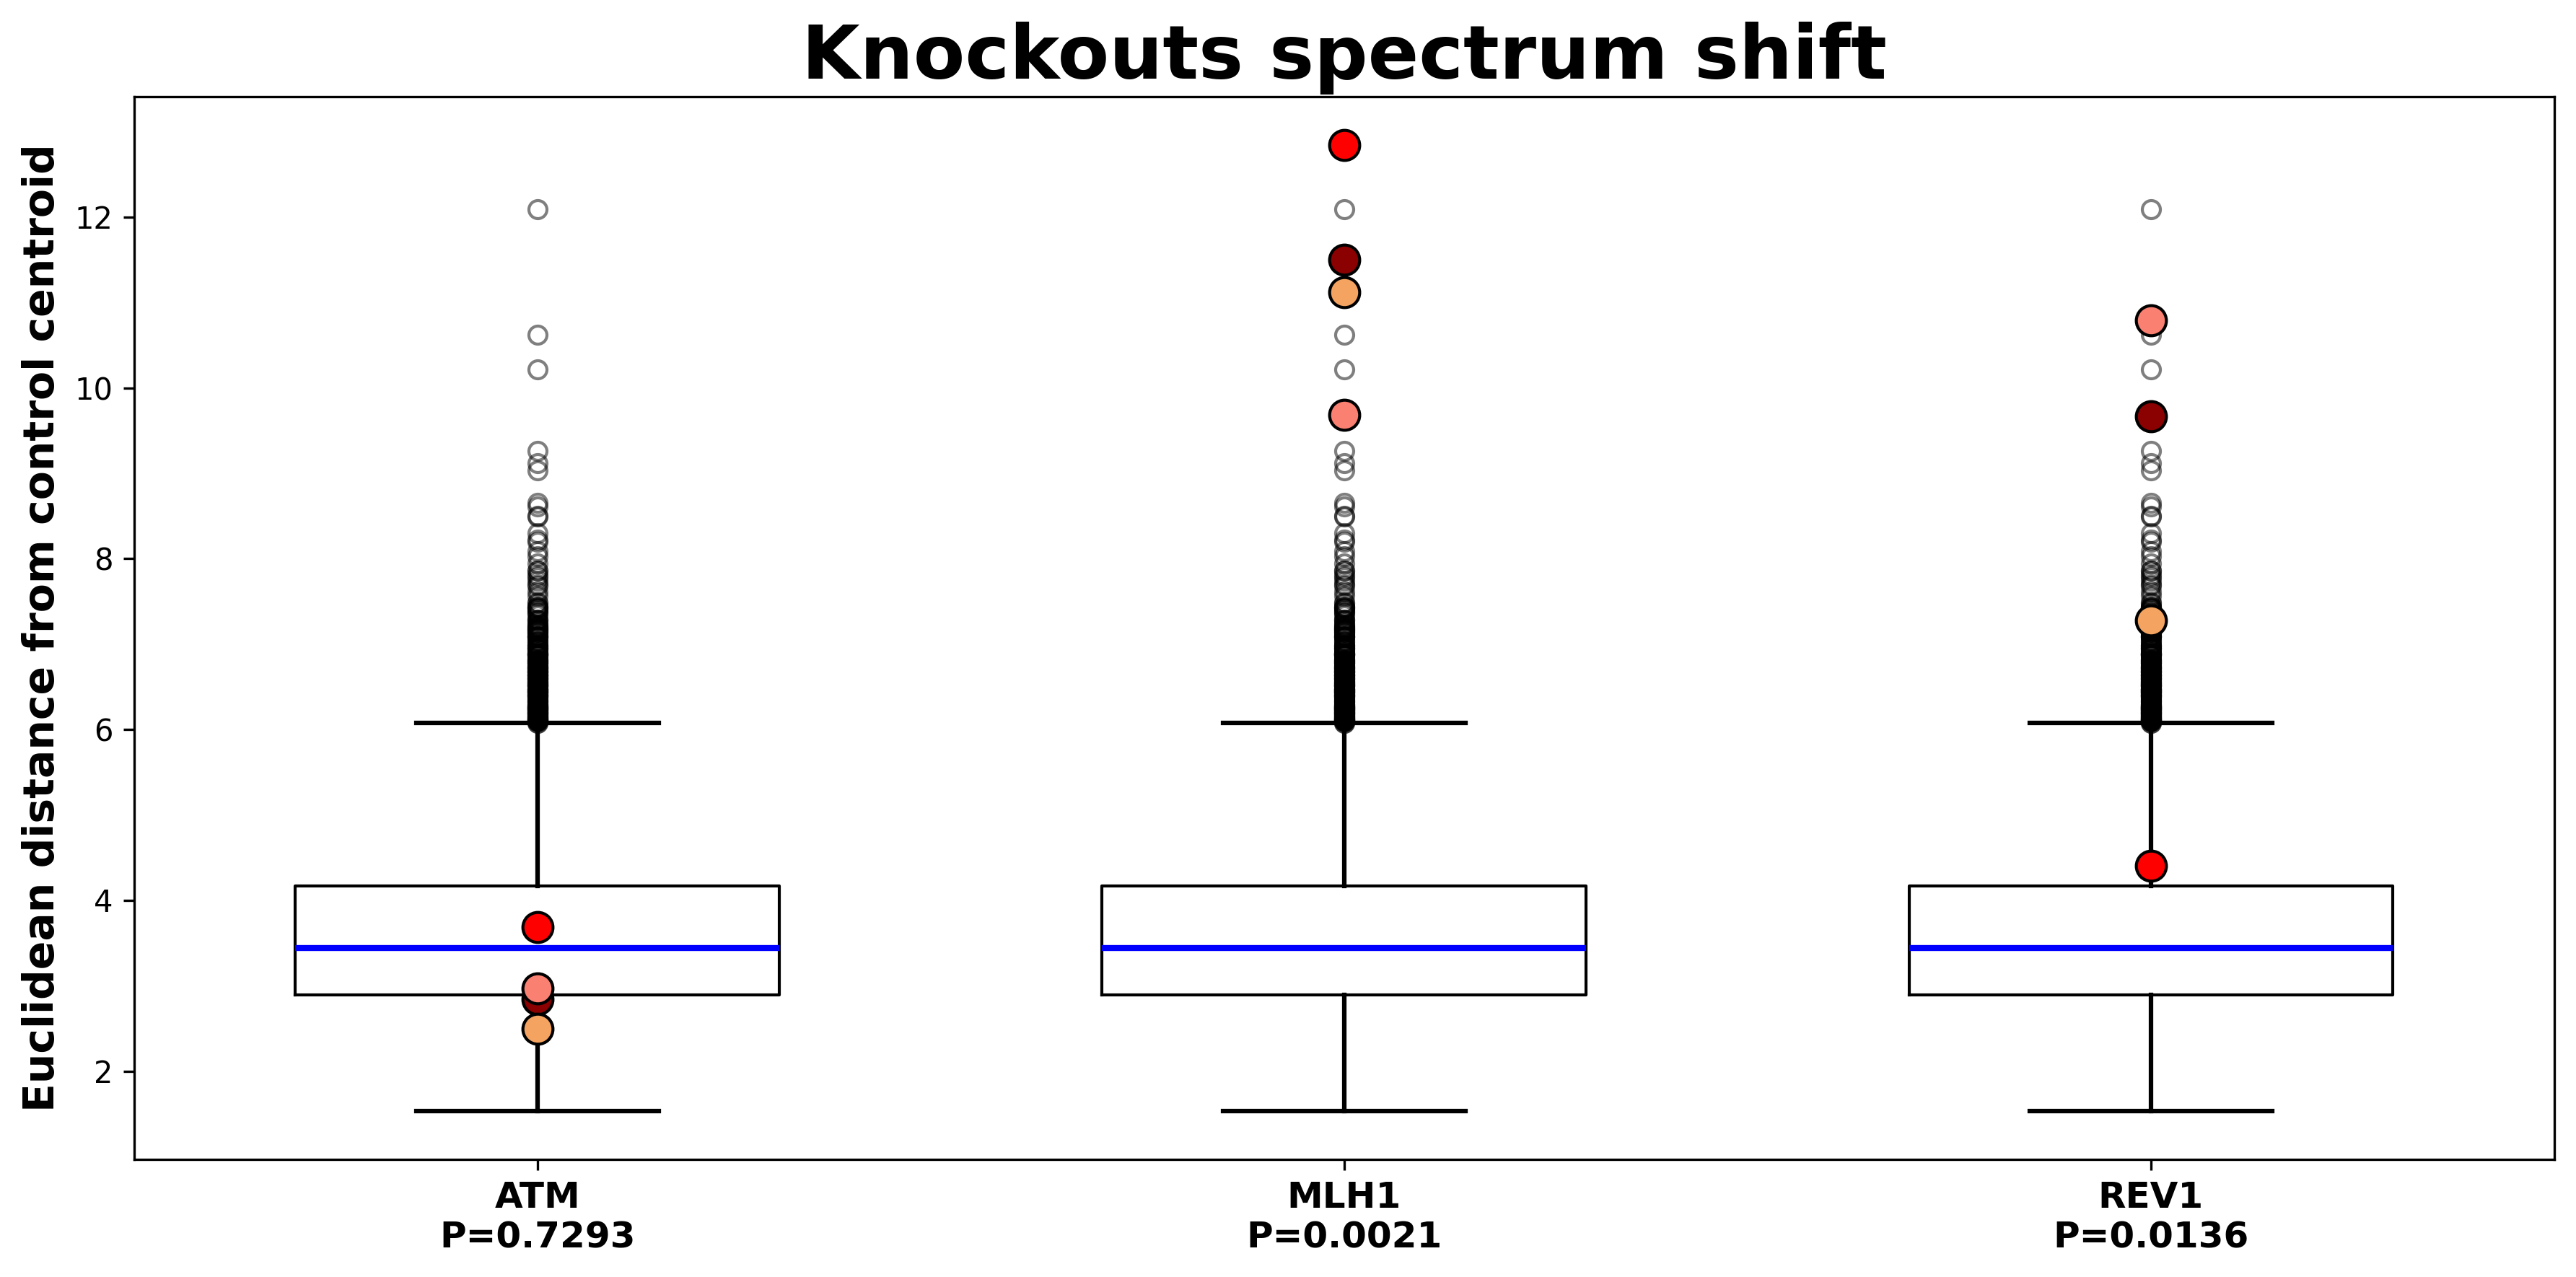

In [25]:
#boxplot of ALL bootstrapped results

#boxplot of bootstrap results
i1= [i for i, val in enumerate(exp_names) if val.startswith('ATM')] # indices of ATM ko
i2= [i for i, val in enumerate(exp_names) if val.startswith('MLH1')] # indices of MLH1 ko
i3= [i for i, val in enumerate(exp_names) if val.startswith('REV1')] # indices of REV1 ko

d_ko_1 = [d_exp_all[i] for i in i1] # distance of ATM ko from the control normalized center
p_ko_1 = [p_adj_all[i] for i in i1] # corrected p-values of FANCM ko
d_ko_2 = [d_exp_all[i] for i in i2] # distance of MLH1 ko from the control normalized center
p_ko_2 = [p_adj_all[i] for i in i2] # corrected p-values of MLH1 ko
d_ko_3 = [d_exp_all[i] for i in i3] # distance of REV1 ko from the control normalized center
p_ko_3 = [p_adj_all[i] for i in i3] # corrected p-values of REV1 ko

colors = ['darkred', 'red', 'salmon', 'sandybrown']
# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(d_pc_all, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(d_ko_1, colors)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(d_pc_all, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(d_ko_2, colors)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(d_pc_all, positions=[3], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(d_ko_3, colors)):
    plt.scatter(3, value, color=c, s=100, edgecolor='black', zorder=3)


# Customize x-axis
plt.xticks([1, 2, 3], [f'ATM\nP={gmean(p_ko_1):.4f}', f'MLH1\nP={gmean(p_ko_2):.4f}', f'REV1\nP={gmean(p_ko_3):.4f}'], fontsize=12, fontweight='bold')

# Add labels and legend
plt.ylabel('Euclidean distance from control centroid', fontsize=14, fontweight='bold')
plt.title('Knockouts spectrum shift', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

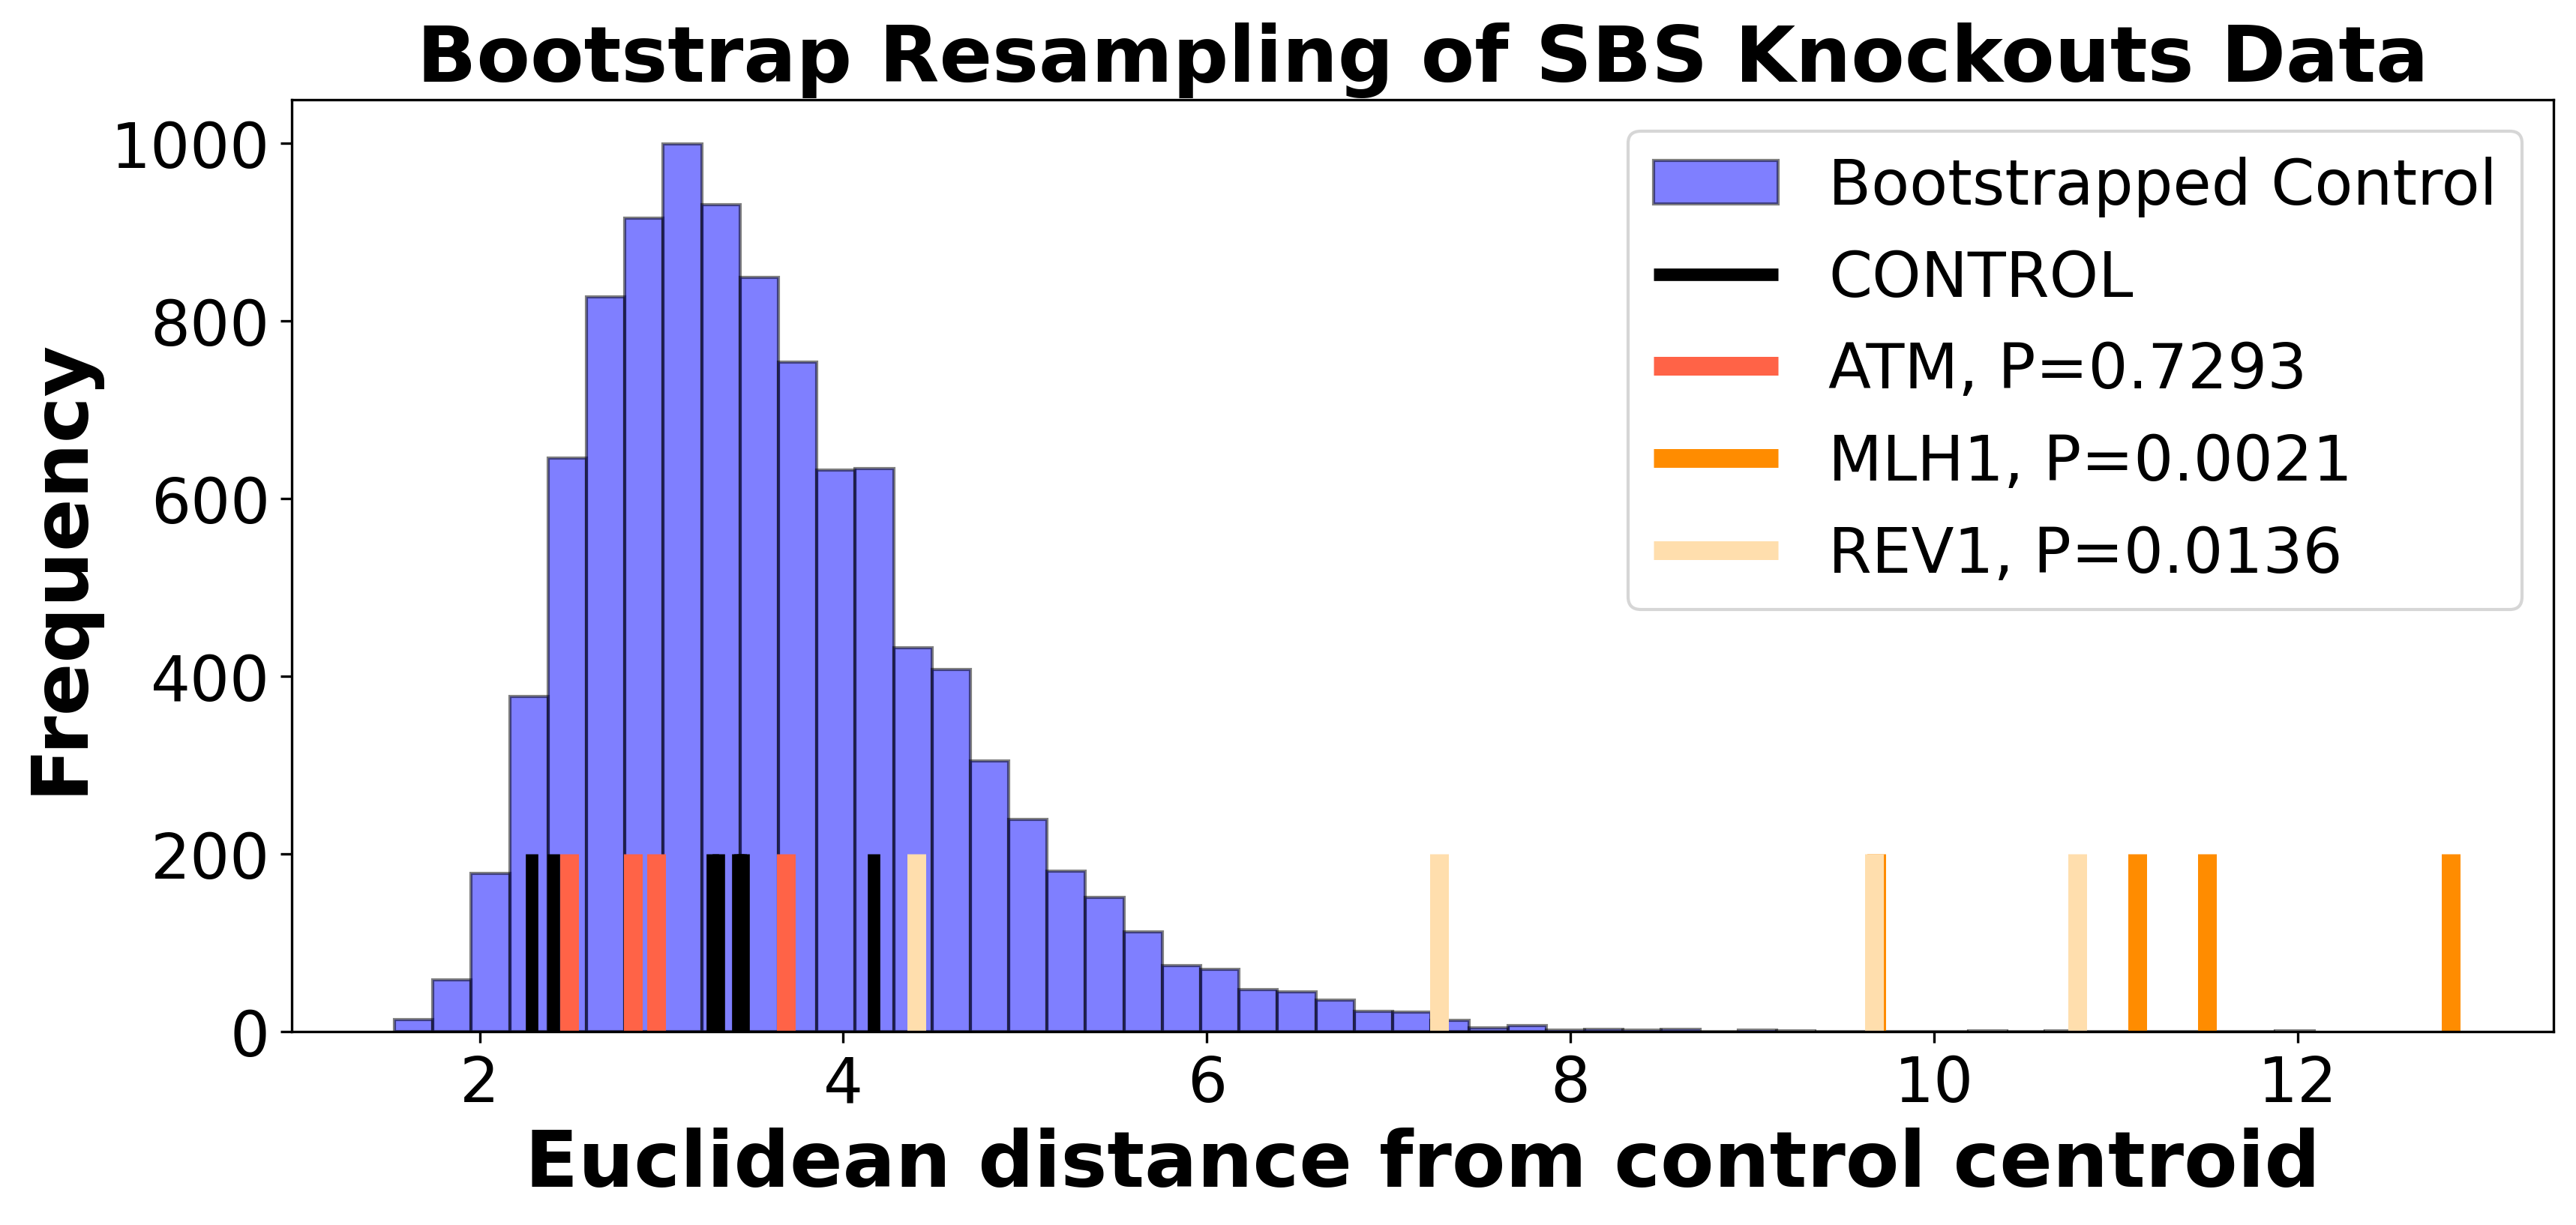

In [26]:
# histogram representation of ALL bootstrapped results
kos_thesis = ['ATM', 'MLH1', 'REV1']
d_pc_all_thesis = d_pc_all
d_control_all_thesis = d_control_all
d_exp_all_thesis = []
p_adj_all_thesis = []
names_thesis = []


for ko in kos_thesis:
  for i, name in enumerate(exp_names):
    if name == ko:
      names_thesis.append(name)
      d_exp_all_thesis.append(d_exp_all[i])
      p_adj_all_thesis.append(p_adj_all[i])

n = names_thesis[0]
counter = 0

# Keep track of names already added to the legend
plotted_names = set()
plt.figure(figsize=(12,6), dpi=300)
plt.rcParams.update({'font.size': 25})
colors = ['tomato', 'darkorange', 'navajowhite']
plt.hist(d_pc_all_thesis, bins=50, alpha=0.5, color='blue', edgecolor='black', label='Bootstrapped Control')
# Plot thick vertical lines for controls
for x in d_control_all_thesis:
    plt.vlines(x, 0, 200, color='black', linewidth=4, label='CONTROL' if 'CONTROL' not in plotted_names else "")
    plotted_names.add('CONTROL')

for j, (x, name, p) in enumerate(zip(d_exp_all_thesis, names_thesis, p_adj_all_thesis)):
  if name == n and name not in plotted_names: # the first replicate
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6,label=f'{name}, P={gmean(p_adj_all_thesis[j:j+4]):.4f}')
  elif name==n:
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6)
  else:
    counter+=1
    n = name
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6, label=f'{name}, P={gmean(p_adj_all_thesis[j:j+4]):.4f}')

plt.legend(fontsize=20)
plt.title('Bootstrap Resampling of SBS Knockouts Data', fontsize=25, fontweight='bold')
plt.xlabel('Euclidean distance from control centroid', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

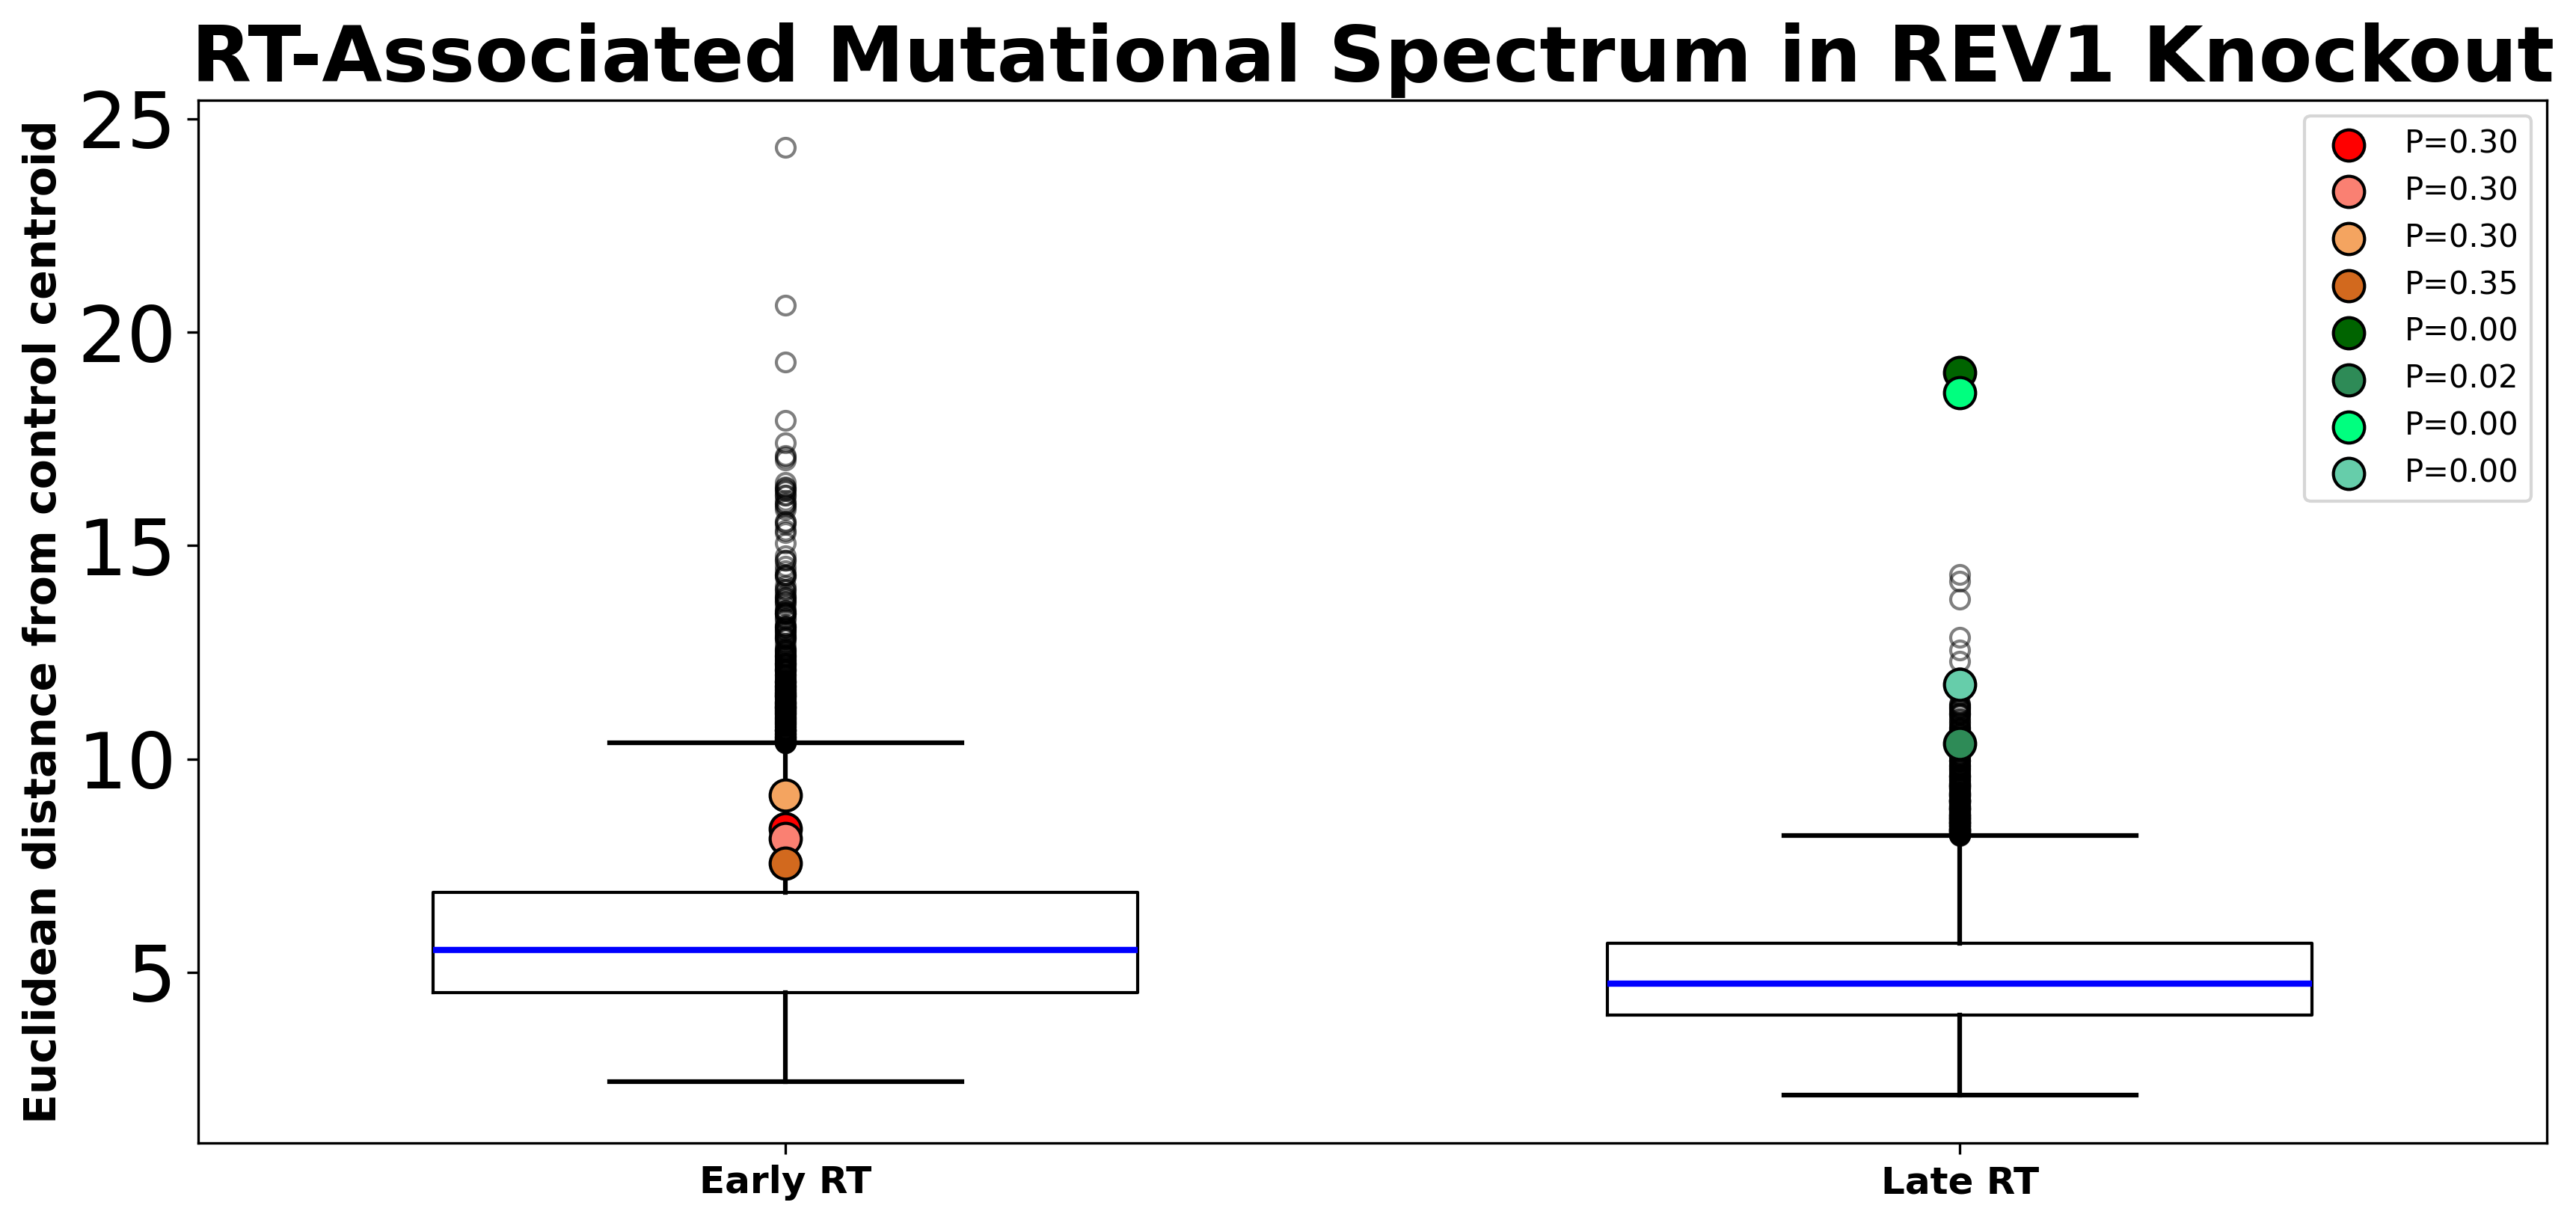

In [27]:
#boxplot of RT-associated bootstrap results
#REV1
# Sample data
ind = [i for i, val in enumerate(exp_names) if val=='REV1'] # indices of MSH ko
d_ko_early = [d_exp_early[i] for i in ind] # distance of MSH ko from the control normalized center
p_ko_early = [p_adj_early[i] for i in ind] # corrected p-values of MSH2 ko
d_ko_late = [d_exp_late[i] for i in ind] # distance of MSH ko from the control normalized center
p_ko_late = [p_adj_late[i] for i in ind] # corrected p-values of MSH2 ko

colors_early = ['red', 'salmon', 'sandybrown', 'chocolate']
colors_late = ['darkgreen', 'seagreen', 'springgreen', 'mediumaquamarine']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(d_pc_early, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c, p) in enumerate(zip(d_ko_early, colors_early, p_ko_early)):
    plt.scatter(1, value, color=c, label=f'P={p:.2f}', s=100, edgecolor='black', zorder=3)

# Create the late boxplot
plt.boxplot(d_pc_late, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the late boxplot
for i, (value, c, p) in enumerate(zip(d_ko_late, colors_late, p_ko_late)):
    plt.scatter(2, value, color=c, label=f'P={p:.2f}', s=100, edgecolor='black', zorder=3)

# Customize x-axis
plt.xticks([1, 2], ['Early RT', 'Late RT'], fontsize=12, fontweight='bold')

# Add labels and legend
plt.ylabel('Euclidean distance from control centroid', fontsize=14, fontweight='bold')
#plt.xlabel('Control bootstrapped data', fontsize=14, fontweight='bold')
plt.title('RT-Associated Mutational Spectrum in REV1 Knockout', fontsize=25, fontweight='bold')
plt.legend(fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

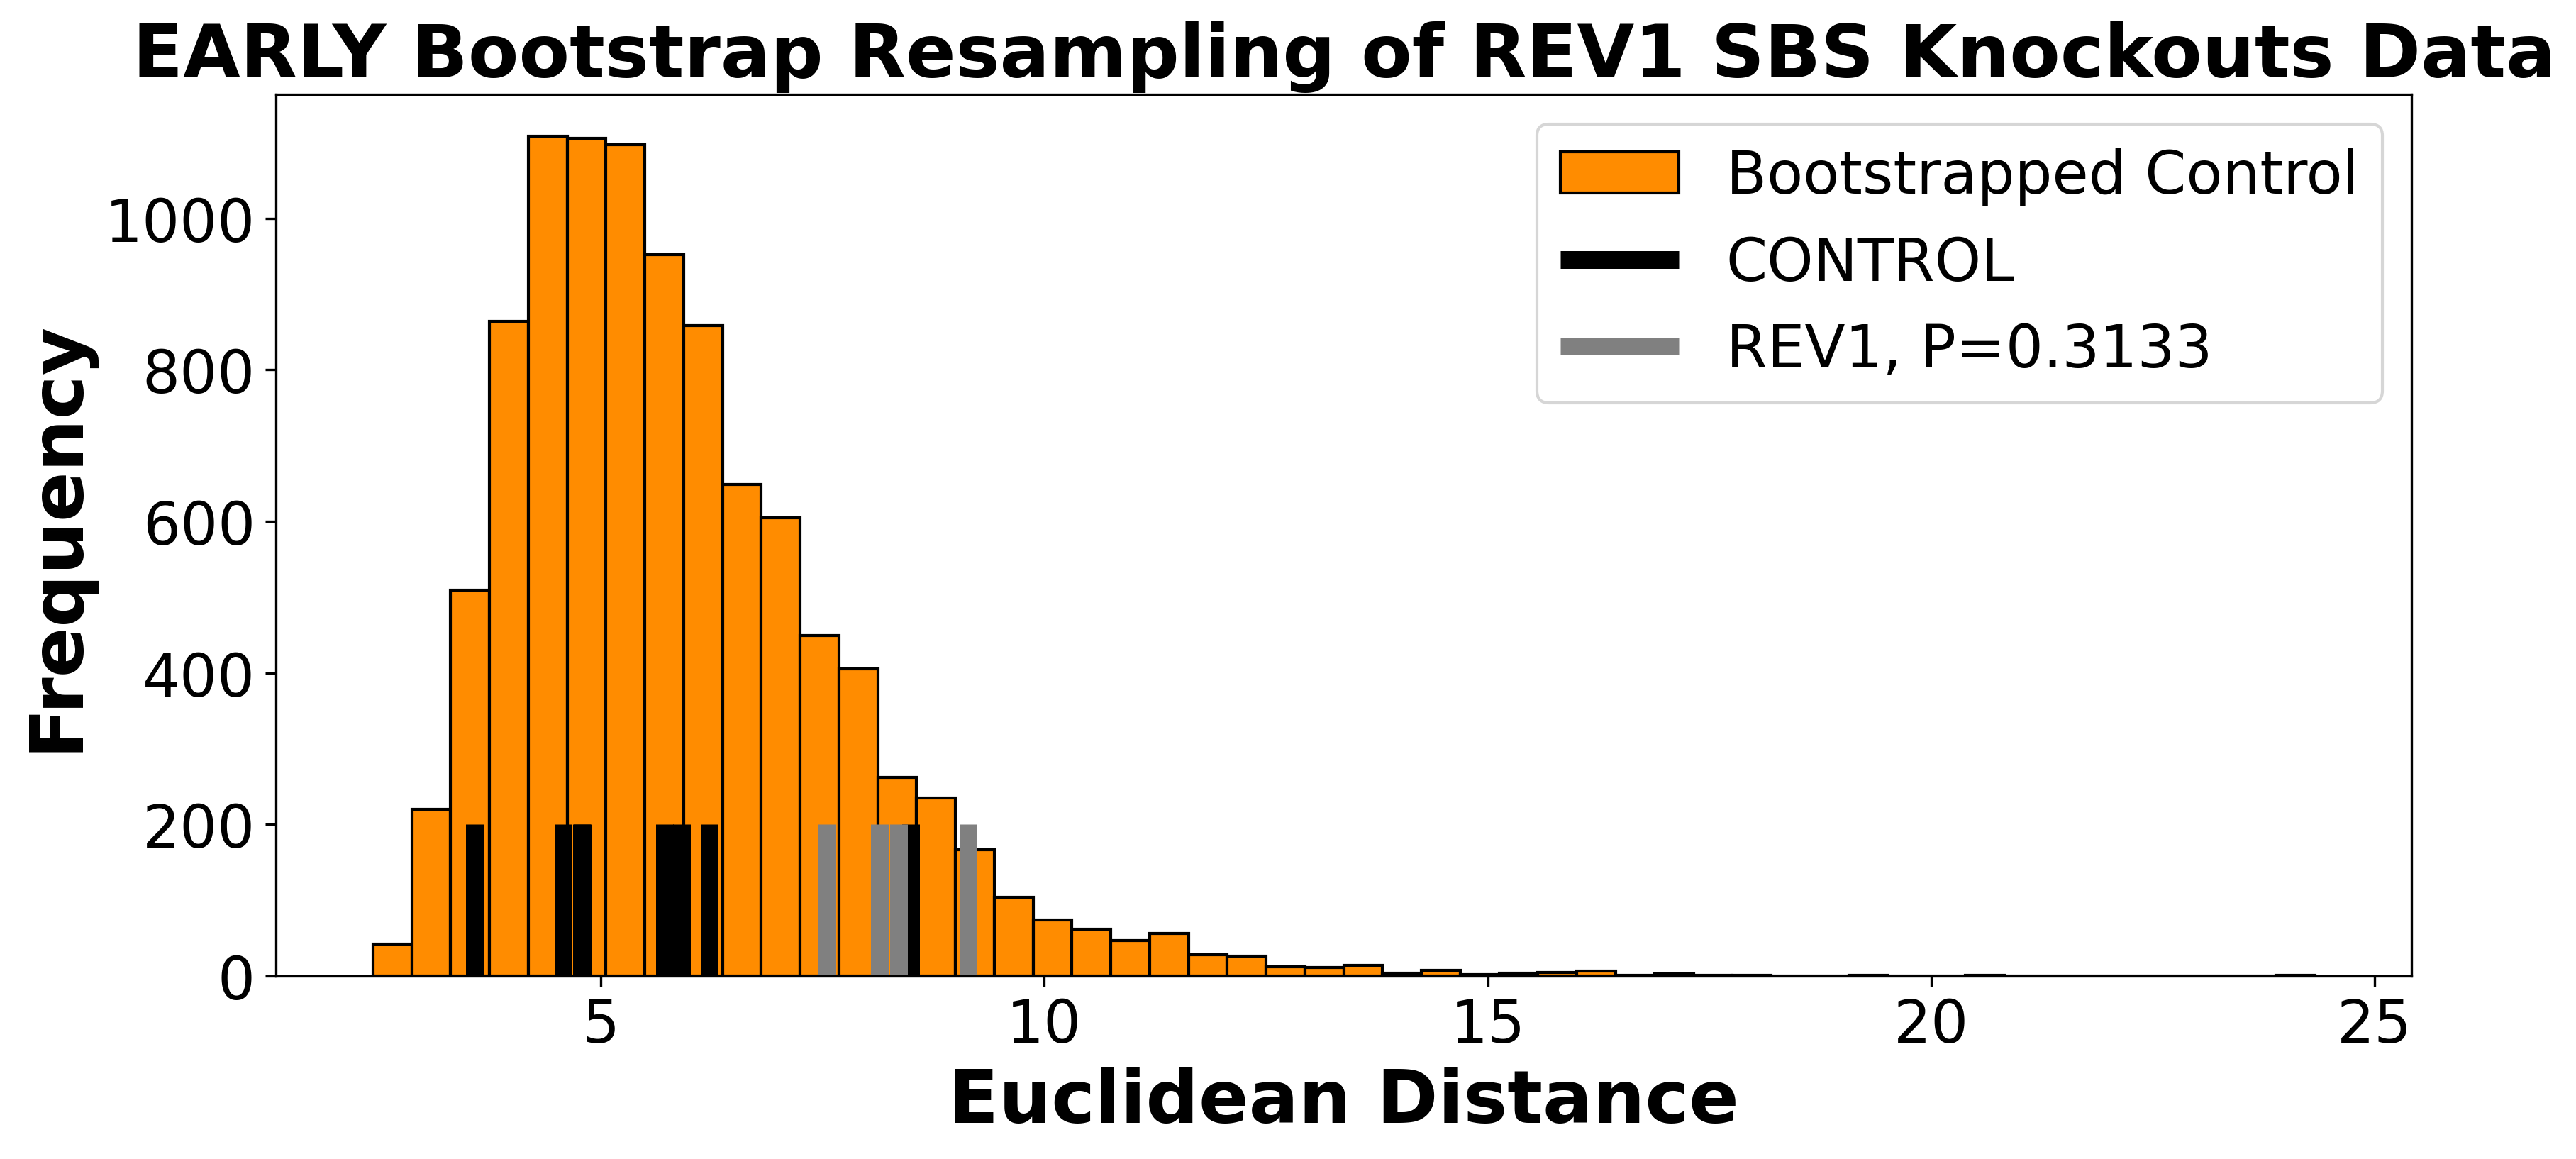

In [29]:
#histogram of REV1 EARLY bootstrap results
kos_thesis = ['REV1']
d_pc_early_thesis = d_pc_early
d_control_early_thesis = d_control_early
d_exp_early_thesis = []
p_adj_early_thesis = []
names_thesis = []


for ko in kos_thesis:
  for i, name in enumerate(exp_names):
    if name == ko:
      names_thesis.append(name)
      d_exp_early_thesis.append(d_exp_early[i])
      p_adj_early_thesis.append(p_adj_early[i])

n = names_thesis[0]
counter = 0

# Keep track of names already added to the legend
plotted_names = set()

plt.figure(figsize=(12,6), dpi=300)
plt.rcParams.update({'font.size': 25})
colors = ['grey']
plt.hist(d_pc_early_thesis, bins=50, color='darkorange', edgecolor='black', label='Bootstrapped Control')
# Plot thick vertical lines for controls
for x in d_control_early_thesis:
    plt.vlines(x, 0, 200, color='black', linewidth=6, label='CONTROL' if 'CONTROL' not in plotted_names else "")
    plotted_names.add('CONTROL')
# Plot thick vertical lines for KO
for j, (x, name) in enumerate(zip(d_exp_early_thesis, names_thesis)):
  if name == n and name not in plotted_names: # the first replicate
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6, label=f'{name}, P={gmean(p_adj_early_thesis[j:j+4]):.4f}')
  elif name==n:
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6)
  else:
    counter+=1
    n = name
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6, label=f'{name}, P={gmean(p_adj_early_thesis[j:j+4]):.4f}')

plt.legend(fontsize=20)
plt.title('EARLY Bootstrap Resampling of REV1 SBS Knockouts Data', fontsize=25, fontweight='bold')
plt.xlabel('Euclidean Distance', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

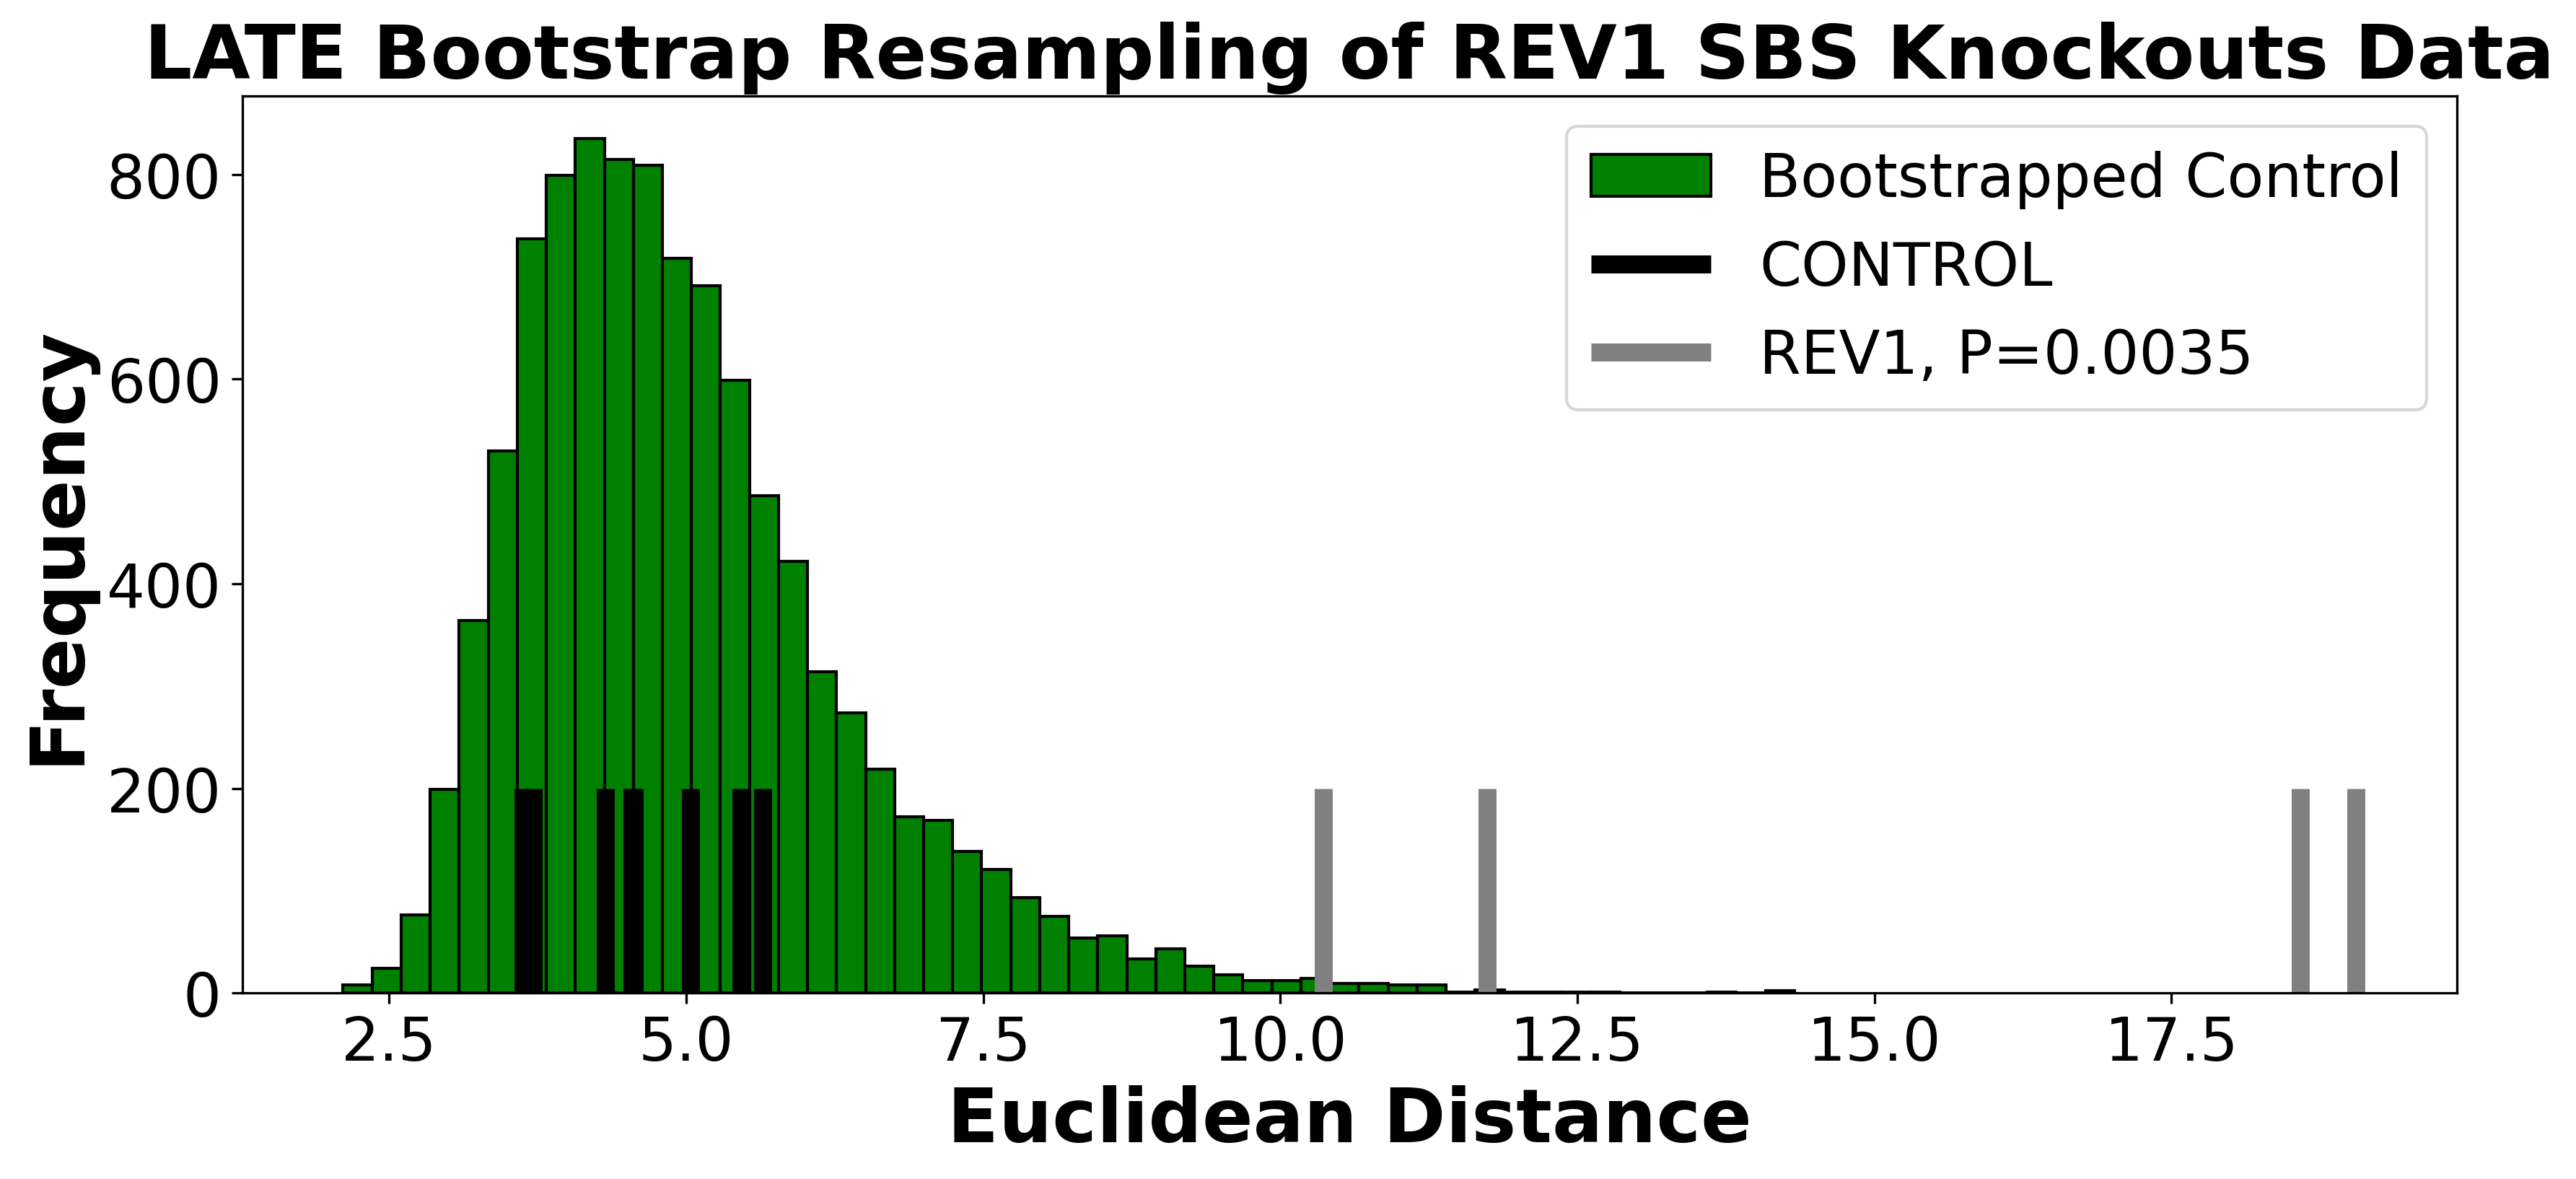

In [30]:
#histogram of REV1 LATE bootstrap results
kos_thesis = ['REV1']
d_pc_late_thesis = d_pc_late
d_control_late_thesis = d_control_late
d_exp_late_thesis = []
p_adj_late_thesis = []
names_thesis = []


for ko in kos_thesis:
  for i, name in enumerate(exp_names):
    if name == ko:
      names_thesis.append(name)
      d_exp_late_thesis.append(d_exp_late[i])
      p_adj_late_thesis.append(p_adj_late[i])

n = names_thesis[0]
counter = 0

# Keep track of names already added to the legend
plotted_names = set()

plt.figure(figsize=(12,6), dpi=300)
plt.rcParams.update({'font.size': 25})
colors=['grey']
plt.hist(d_pc_late_thesis, bins=50, color='green', edgecolor='black', label='Bootstrapped Control')
# Plot thick vertical line for control
for x in d_control_late_thesis:
    plt.vlines(x, 0, 200, color='black', linewidth=6, label='CONTROL' if 'CONTROL' not in plotted_names else "")
    plotted_names.add('CONTROL')
# Plot thick vertical lines for KO
for j, (x, name) in enumerate(zip(d_exp_late_thesis, names_thesis)):
  if name == n and name not in plotted_names: # the first replicate
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6, label=f'{name}, P={gmean(p_adj_late_thesis[j:j+4]):.4f}')
  elif name==n:
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6)
  else:
    counter+=1
    n = name
    plotted_names.add(name)
    plt.vlines(x, 0, 200, color=colors[counter], linewidth=6, label=f'{name}, P={gmean(p_adj_late_thesis[j:j+4]):.4f}')

plt.legend(fontsize=20)
plt.title('LATE Bootstrap Resampling of REV1 SBS Knockouts Data', fontsize=25, fontweight='bold')
plt.xlabel('Euclidean Distance', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.show()

In [31]:
# get mutations counts for control and each KO
def get_counts_data(control, exp):
  control_counts = []
  exp_counts = []
  for col in control:
    control_counts.append(sum(col))
  for col in exp:
    exp_counts.append(sum(col))
  return control_counts, exp_counts

all_control_counts, all_exp_counts = get_counts_data(control_columns, exp_columns)
early_control_counts, early_exp_counts = get_counts_data(control_e_columns, exp_e_columns)
late_control_counts, late_exp_counts = get_counts_data(control_l_columns, exp_l_columns)

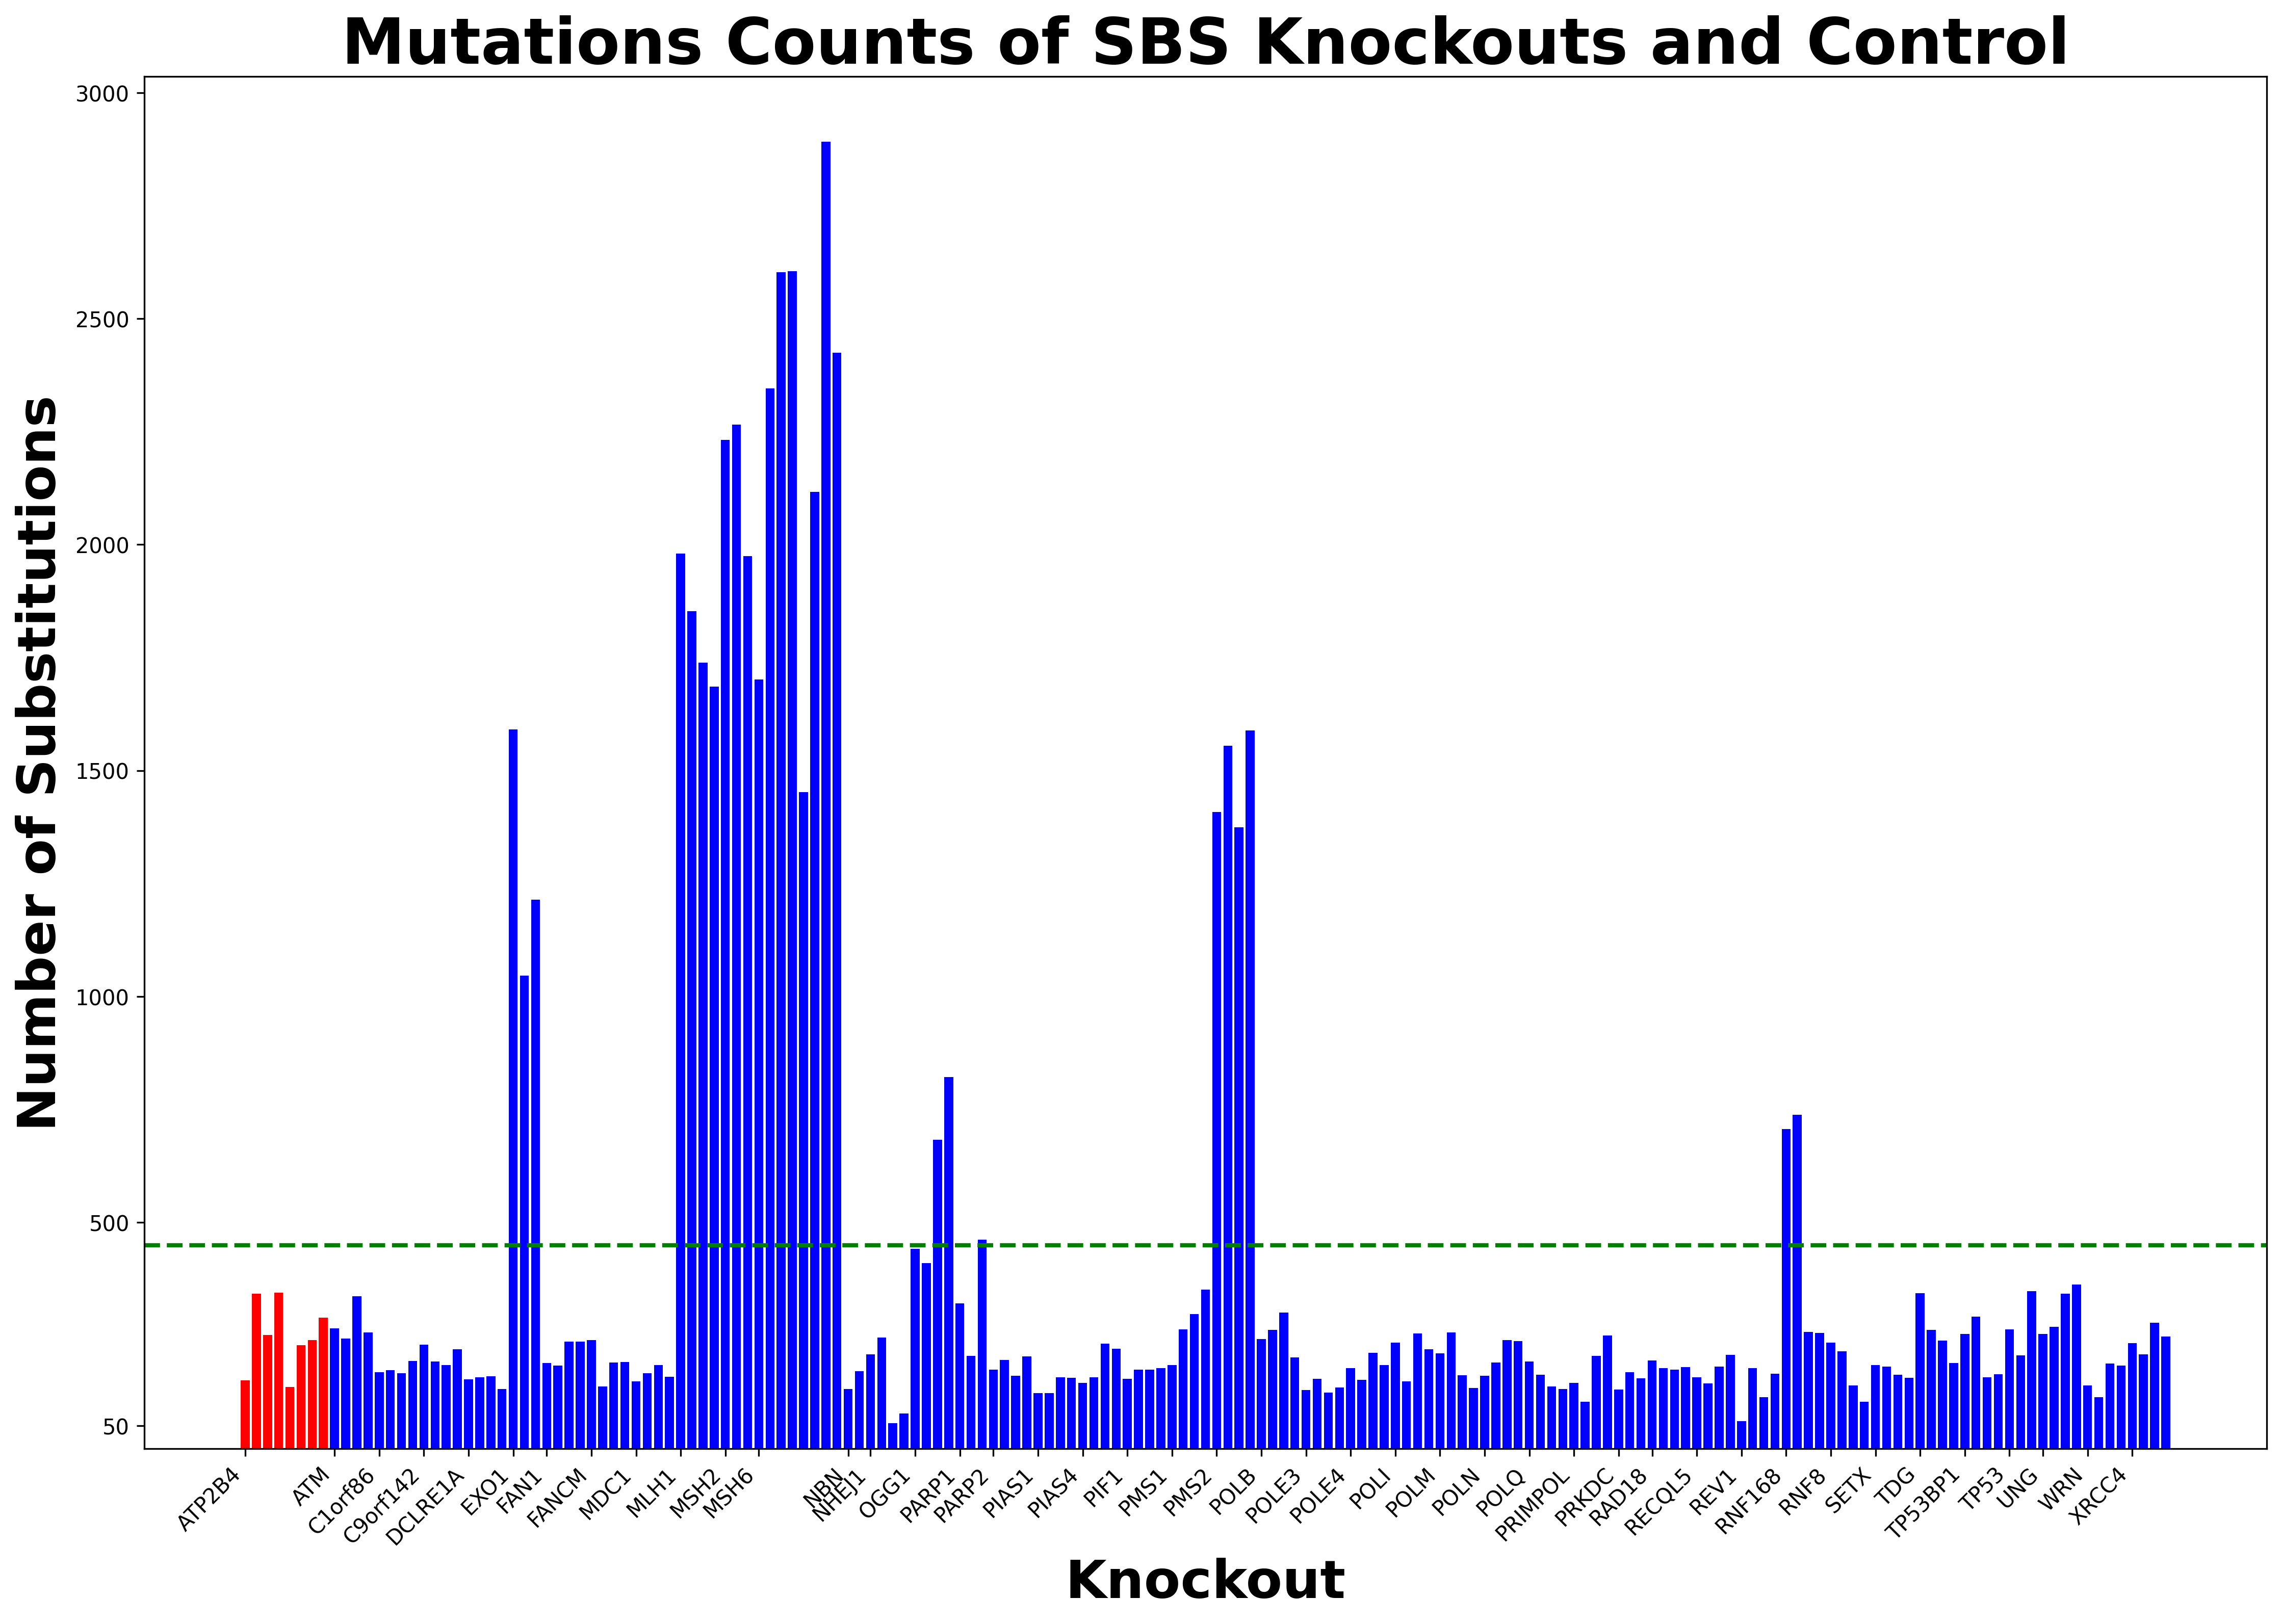

In [32]:
# create histogram of all the counts (in ALL RT) - visualization of counts
counts_data = all_control_counts + all_exp_counts
labels = control_names+exp_names

plt.figure(figsize=(16,12), dpi=300)
plt.rcParams.update({'font.size': 25})
bars = plt.bar(range(len(counts_data)), counts_data, color=['red' if name == 'ATP2B4' else 'blue' for name in labels])

# Create a set to track unique labels
unique_labels = set()
unique_label_indices = []
final_xtick_labels = []

# Find the first occurrence of each unique label
for i, name in enumerate(labels):
    if name not in unique_labels:
        unique_labels.add(name)
        unique_label_indices.append(i)
        final_xtick_labels.append(name)

# Set x-axis ticks and labels with only unique labels
plt.xticks(unique_label_indices, final_xtick_labels, rotation=45, ha='right')
plt.axhline(y=450, color='green', linestyle='--', linewidth=2)

# Set specific y-axis ticks
specific_ticks = [50, 500, 1000, 1500, 2000, 2500, 3000]
plt.yticks(specific_ticks, specific_ticks)
plt.title('Mutations Counts of SBS Knockouts and Control', fontweight='bold')
plt.xlabel('Knockout', fontweight='bold')
plt.ylabel('Number of Substitutions', fontweight='bold')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [33]:
# fix the KOs names list
exp_names_upd = sorted(set(exp_names))
print(exp_names_upd.index('TP53BP1'), exp_names_upd.index('TP53'))
exp_names_upd[37] = 'TP53BP1'
exp_names_upd[38] = 'TP53'
print(len(exp_names_upd), exp_names_upd)
print(exp_names)

38 37
42 ['ATM', 'C1orf86', 'C9orf142', 'DCLRE1A', 'EXO1', 'FAN1', 'FANCM', 'MDC1', 'MLH1', 'MSH2', 'MSH6', 'NBN', 'NHEJ1', 'OGG1', 'PARP1', 'PARP2', 'PIAS1', 'PIAS4', 'PIF1', 'PMS1', 'PMS2', 'POLB', 'POLE3', 'POLE4', 'POLI', 'POLM', 'POLN', 'POLQ', 'PRIMPOL', 'PRKDC', 'RAD18', 'RECQL5', 'REV1', 'RNF168', 'RNF8', 'SETX', 'TDG', 'TP53BP1', 'TP53', 'UNG', 'WRN', 'XRCC4']
['ATM', 'ATM', 'ATM', 'ATM', 'C1orf86', 'C1orf86', 'C1orf86', 'C1orf86', 'C9orf142', 'C9orf142', 'C9orf142', 'C9orf142', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'DCLRE1A', 'EXO1', 'EXO1', 'EXO1', 'FAN1', 'FAN1', 'FAN1', 'FAN1', 'FANCM', 'FANCM', 'FANCM', 'FANCM', 'MDC1', 'MDC1', 'MDC1', 'MDC1', 'MLH1', 'MLH1', 'MLH1', 'MLH1', 'MSH2', 'MSH2', 'MSH2', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'MSH6', 'NBN', 'NBN', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'NHEJ1', 'OGG1', 'OGG1', 'OGG1', 'OGG1', 'PARP1', 'PARP1', 'PARP1', 'PARP2', 'PARP2', 'PARP2', 'PARP2', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS1', 'PIAS4', 'PIAS4', 'PIAS4', 'PIAS4', 'P

In [35]:
#initial mann-whitney test
def calculate_mann_whitney(exp_sums, control_sums):

  p_vals = [] #list of the p-vals from each test (165 total)
  exp_sums_specific = [] #list of mutation count for each test (165 total)

  for name in exp_names_upd:
    ind = [index for index, value in enumerate(exp_names) if value == name]
    tmp = []
    for i in ind:
      tmp.append(exp_sums[i])
    statistic, p_value = mannwhitneyu(control_sums, tmp)
    exp_sums_specific.append(sorted(tmp))
    p_vals.append(p_value)
  data = {
    'Gene': exp_names_upd,
    'Count': exp_sums_specific,
    'Control': [control_sums]*42,
    'P-val': p_vals
  }
  df = pd.DataFrame(data)
  return df

all_df = calculate_mann_whitney(all_exp_counts, all_control_counts)
early_df = calculate_mann_whitney(early_exp_counts, early_control_counts)
late_df = calculate_mann_whitney(late_exp_counts, late_control_counts)
print(all_df.head())
print('\n')
print(early_df.head())
print('\n')
print(late_df.head())

       Gene                 Count                                   Control  \
0       ATM  [243, 257, 266, 337]  [151, 343, 251, 345, 136, 229, 240, 289]   
1   C1orf86  [167, 169, 173, 194]  [151, 343, 251, 345, 136, 229, 240, 289]   
2  C9orf142  [185, 193, 220, 230]  [151, 343, 251, 345, 136, 229, 240, 289]   
3   DCLRE1A  [132, 153, 158, 160]  [151, 343, 251, 345, 136, 229, 240, 289]   
4      EXO1    [1046, 1214, 1591]  [151, 343, 251, 345, 136, 229, 240, 289]   

      P-val  
0  0.569697  
1  0.214141  
2  0.282828  
3  0.109091  
4  0.012121  


       Gene               Count                              Control     P-val
0       ATM  [93, 94, 101, 117]  [58, 136, 100, 135, 41, 87, 79, 97]  0.569697
1   C1orf86    [51, 59, 68, 70]  [58, 136, 100, 135, 41, 87, 79, 97]  0.153535
2  C9orf142    [70, 78, 92, 95]  [58, 136, 100, 135, 41, 87, 79, 97]  0.569697
3   DCLRE1A    [51, 55, 63, 65]  [58, 136, 100, 135, 41, 87, 79, 97]  0.109091
4      EXO1     [480, 547, 760]  [58, 136, 1

In [36]:
def find_min_pval_df(gene, all, early, late):
    # Select the p-val for the specific gene
    pval1 = all[all['Gene'] == gene]['P-val'].iloc[0] if gene in all['Gene'].values else float('inf')
    pval2 = early[early['Gene'] == gene]['P-val'].iloc[0] if gene in early['Gene'].values else float('inf')
    pval3 = late[late['Gene'] == gene]['P-val'].iloc[0] if gene in late['Gene'].values else float('inf')

    # Find the DataFrame with the minimal p-val for the gene
    min_pval_df_name = min((('all', pval1), ('early', pval2), ('late', pval3)), key=lambda x: x[1])[0]
    min_pval_value = min(pval1, pval2, pval3)

    return {'Gene': gene, 'Source': min_pval_df_name, 'MinPVal': min_pval_value}


# Create a list of dictionaries for each gene
gene_dicts = [find_min_pval_df(gene, all_df, early_df, late_df) for gene in exp_names_upd]

# Create the final DataFrame
result_df = pd.DataFrame(gene_dicts)
print(result_df)

        Gene Source   MinPVal
0        ATM    all  0.569697
1    C1orf86  early  0.153535
2   C9orf142   late  0.201940
3    DCLRE1A   late  0.072504
4       EXO1    all  0.012121
5       FAN1   late  0.282828
6      FANCM   late  0.214141
7       MDC1  early  0.109091
8       MLH1    all  0.004040
9       MSH2    all  0.012121
10      MSH6    all  0.000155
11       NBN    all  0.177778
12     NHEJ1   late  0.072727
13      OGG1    all  0.004040
14     PARP1  early  0.306332
15     PARP2  early  0.153535
16     PIAS1  early  0.048485
17     PIAS4    all  0.214141
18      PIF1  early  0.153535
19      PMS1  early  0.367677
20      PMS2    all  0.004040
21      POLB    all  0.933333
22     POLE3    all  0.016162
23     POLE4  early  0.153535
24      POLI    all  0.460606
25      POLM    all  0.282828
26      POLN   late  0.282828
27      POLQ   late  0.041184
28   PRIMPOL   late  0.125707
29     PRKDC    all  0.133333
30     RAD18    all  0.214141
31    RECQL5    all  0.153535
32      RE

In [37]:
#get all the genes that their min_Pval is greater than 0.1
big01_genes = result_df[result_df['MinPVal'] > 0.1]['Gene'].tolist()
print(len(big01_genes), big01_genes)

26 ['ATM', 'C1orf86', 'C9orf142', 'FAN1', 'FANCM', 'MDC1', 'NBN', 'PARP1', 'PARP2', 'PIAS4', 'PIF1', 'PMS1', 'POLB', 'POLE4', 'POLI', 'POLM', 'POLN', 'PRIMPOL', 'PRKDC', 'RAD18', 'RECQL5', 'SETX', 'TDG', 'TP53BP1', 'TP53', 'XRCC4']


In [38]:
# Filter all_df to include only the genes with min_p_val>0.1 (that will join the control)
big01_df = all_df[all_df['Gene'].isin(big01_genes)]
# Find the gene with the minimum P-value within the specified genes
min_pval_gene = big01_df.loc[big01_df['P-val'].idxmin(), 'Gene']
pval_threshold = big01_df.loc[big01_df['P-val'].idxmin(), 'P-val']
print(f"The gene with the minimum all_P-value among the big0.1 is: {min_pval_gene}")
print(f"The corresponding P-value is: {pval_threshold}")
control_genes = all_df[all_df['P-val']>=pval_threshold]['Gene'].tolist() # a list of the genes that their all_pval is bigger than the threshold we found (1.33333)
print(len(control_genes), control_genes)

The gene with the minimum all_P-value among the big0.1 is: PRKDC
The corresponding P-value is: 0.13333333333333333
27 ['ATM', 'C1orf86', 'C9orf142', 'FAN1', 'FANCM', 'MDC1', 'NBN', 'PARP1', 'PARP2', 'PIAS4', 'PIF1', 'PMS1', 'POLB', 'POLE4', 'POLI', 'POLM', 'POLN', 'PRIMPOL', 'PRKDC', 'RAD18', 'RECQL5', 'SETX', 'TDG', 'TP53BP1', 'TP53', 'UNG', 'XRCC4']


In [39]:
all_new_control_df = all_df[all_df['Gene'].isin((control_genes))] #df of the samples that become control
all_new_control_list = all_new_control_df['Count'].tolist() #list of the control counts
all_new_control_counts = [item for sublist in all_new_control_list for item in sublist]
all_new_control_counts = all_control_counts + all_new_control_counts
all_new_control_names = control_names +all_new_control_df['Gene'].tolist()
print(len(all_new_control_list), all_new_control_list, '\n', len(all_new_control_counts), all_new_control_counts, '\n', len(all_new_control_names), all_new_control_names)

early_new_control_df = early_df[early_df['Gene'].isin((control_genes))] #df of the samples that become control
early_new_control_list = early_new_control_df['Count'].tolist() #list of the control counts
early_new_control_counts = [item for sublist in early_new_control_list for item in sublist]
early_new_control_counts = early_control_counts + early_new_control_counts
early_new_control_names = control_names +early_new_control_df['Gene'].tolist()
print(len(early_new_control_list), early_new_control_list, '\n', len(early_new_control_counts), early_new_control_counts, '\n', len(early_new_control_names), early_new_control_names)

late_new_control_df = late_df[late_df['Gene'].isin((control_genes))] #df of the samples that become control
late_new_control_list = late_new_control_df['Count'].tolist() #list of the control counts
late_new_control_counts = [item for sublist in late_new_control_list for item in sublist]
late_new_control_counts = late_control_counts + late_new_control_counts
late_new_control_names = control_names +late_new_control_df['Gene'].tolist()
print(len(late_new_control_list), late_new_control_list, '\n', len(late_new_control_counts), late_new_control_counts, '\n', len(late_new_control_names), late_new_control_names)

27 [[243, 257, 266, 337], [167, 169, 173, 194], [185, 193, 220, 230], [184, 189, 237, 237], [137, 190, 191, 240], [149, 159, 166, 185], [132, 171], [205, 321, 462], [161, 174, 196, 204], [145, 158, 221, 232], [154, 174, 175, 178], [185, 263, 297, 352], [202, 242, 262, 301], [152, 178, 185, 212], [149, 220, 234, 255], [134, 162, 211, 257], [161, 190, 238, 240], [103, 145, 205, 250], [131, 155, 169], [175, 178, 180, 195], [144, 157, 181, 207], [156, 163, 181, 185], [189, 239, 262, 344], [157, 164, 253, 292], [206, 263, 348], [253, 269, 343, 363], [208, 233, 248, 278]] 
 111 [151, 343, 251, 345, 136, 229, 240, 289, 243, 257, 266, 337, 167, 169, 173, 194, 185, 193, 220, 230, 184, 189, 237, 237, 137, 190, 191, 240, 149, 159, 166, 185, 132, 171, 205, 321, 462, 161, 174, 196, 204, 145, 158, 221, 232, 154, 174, 175, 178, 185, 263, 297, 352, 202, 242, 262, 301, 152, 178, 185, 212, 149, 220, 234, 255, 134, 162, 211, 257, 161, 190, 238, 240, 103, 145, 205, 250, 131, 155, 169, 175, 178, 180, 195, 

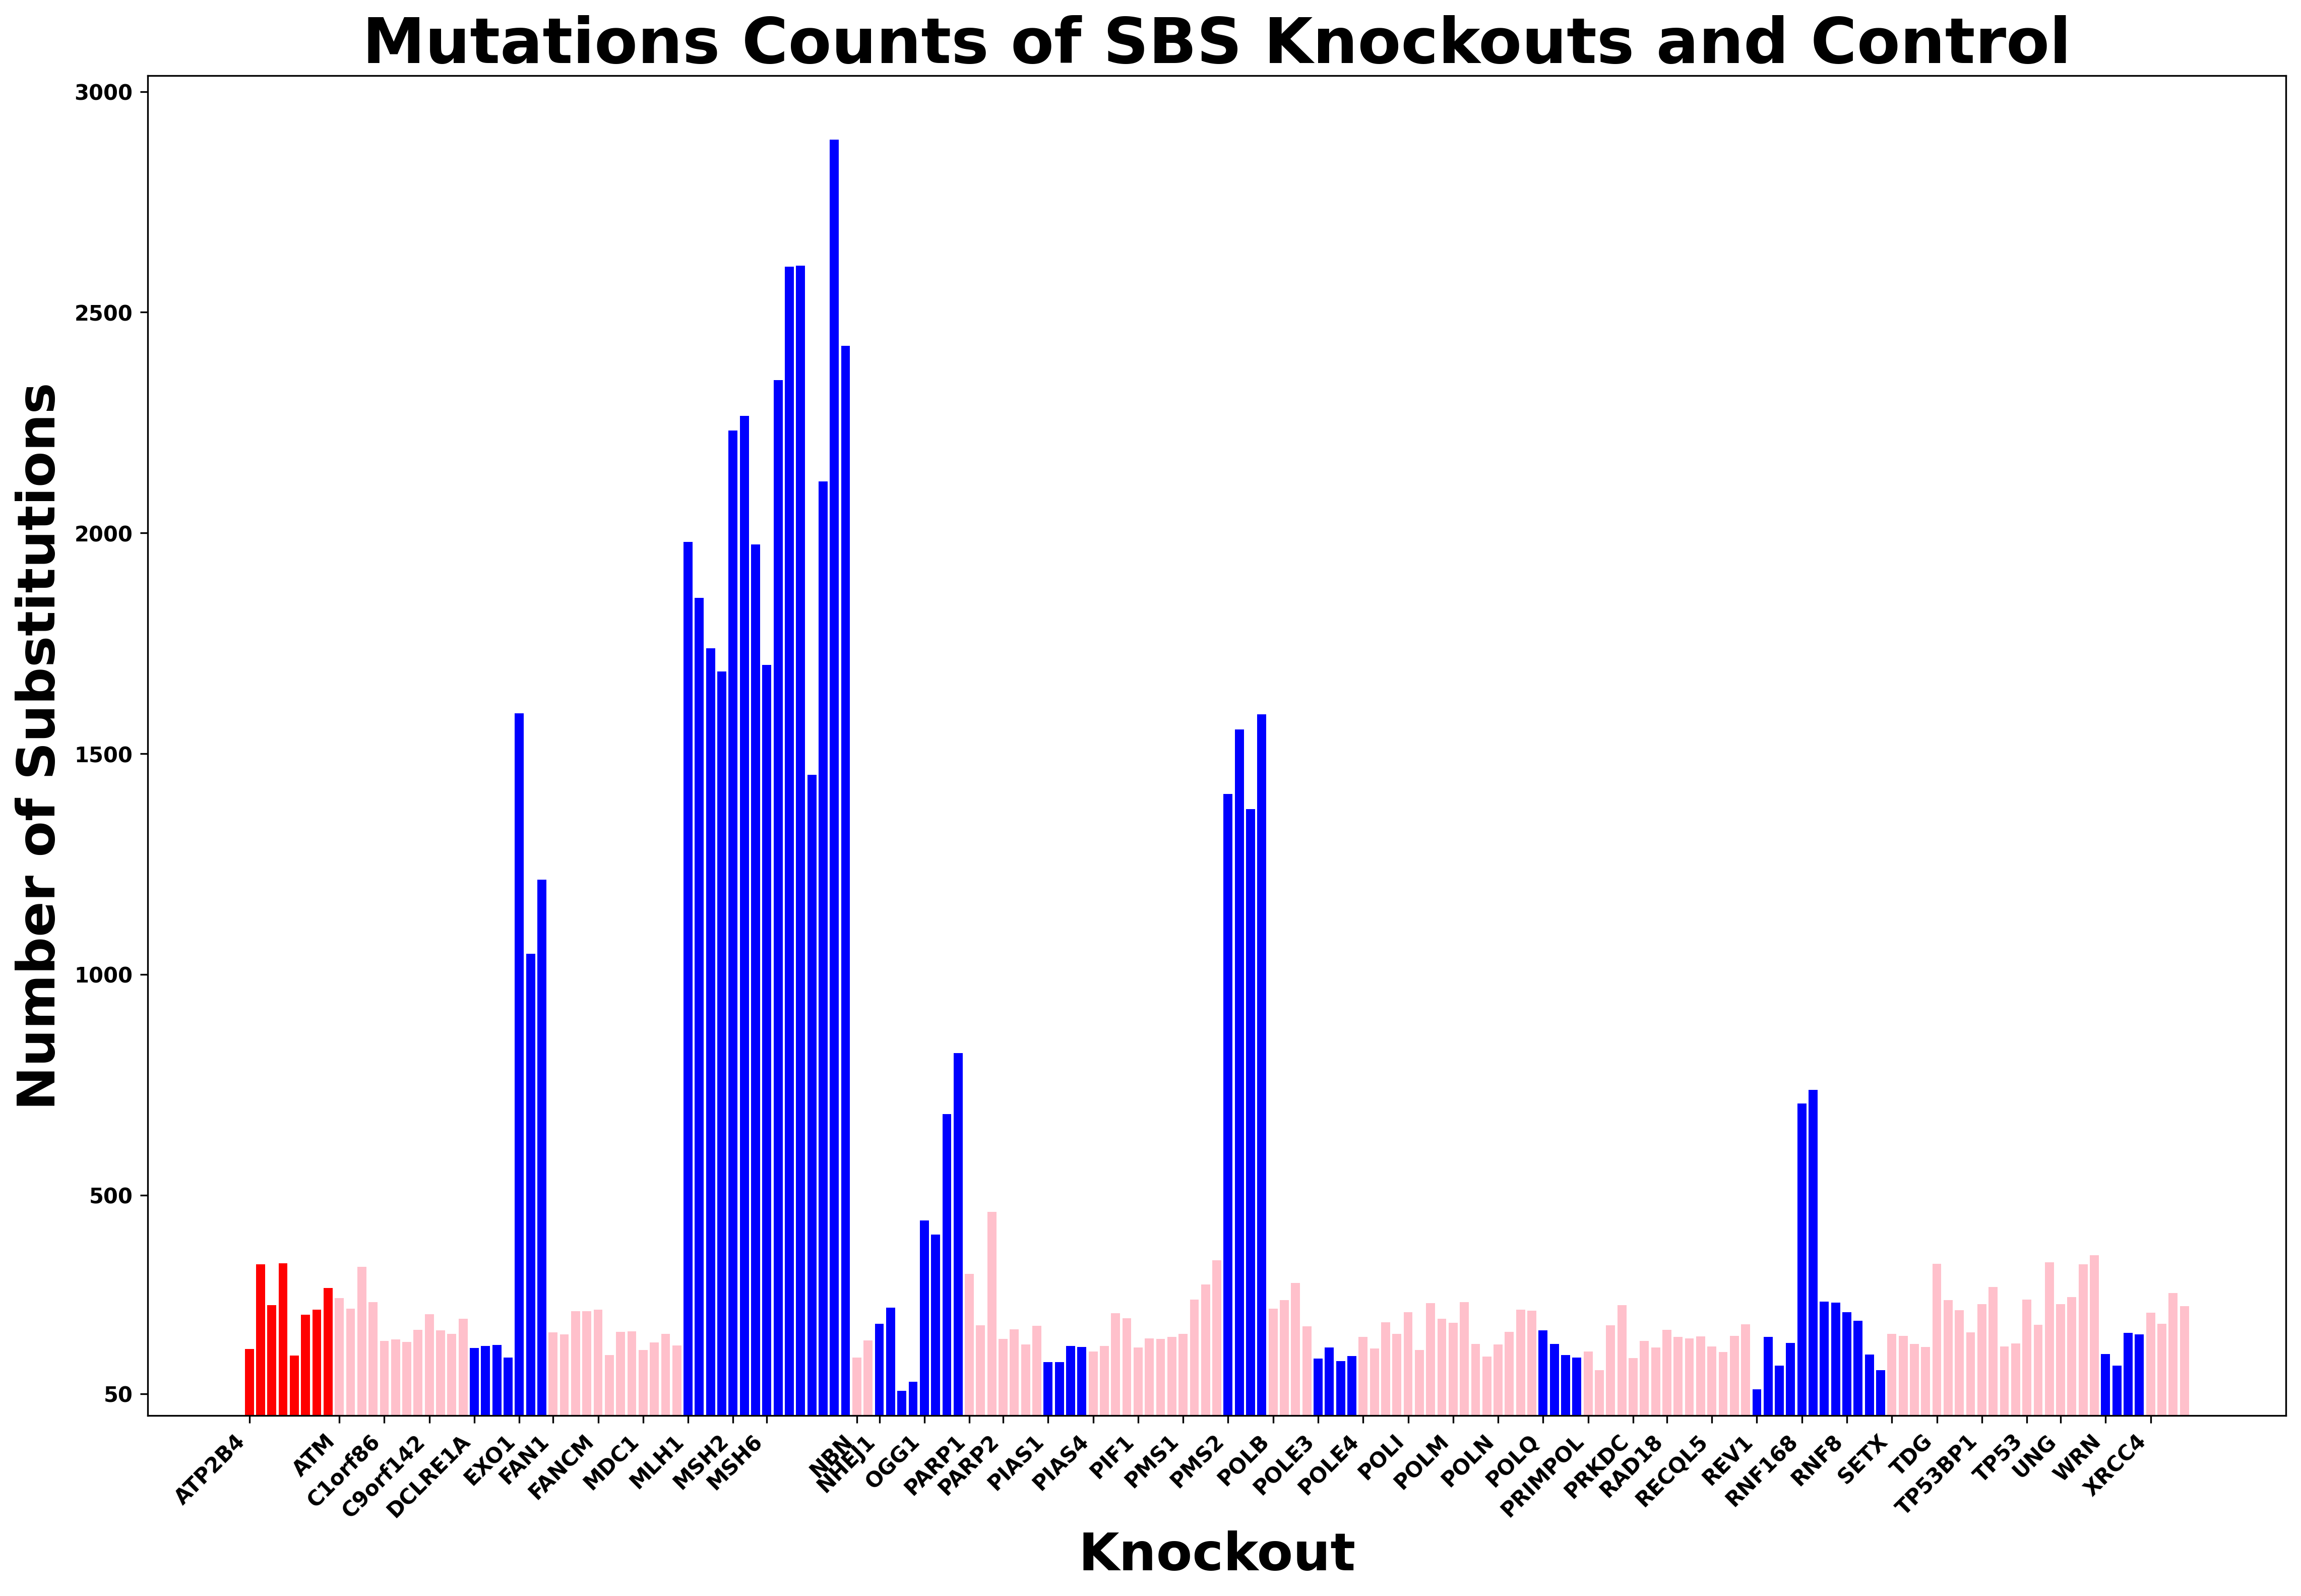

In [40]:
# create histogram of all the counts (in ALL RT) - visualization
counts_data = all_control_counts + all_exp_counts
labels = control_names+exp_names

plt.figure(figsize=(16,12), dpi=300)
plt.rcParams.update({'font.size': 25})
bars = plt.bar(
    range(len(counts_data)),
    counts_data,
    color=[
        'red' if name == 'ATP2B4' else
        'pink' if name in all_new_control_names else
        'blue'
        for name in labels
    ]
)

# Create a set to track unique labels
unique_labels = set()
unique_label_indices = []
final_xtick_labels = []

# Find the first occurrence of each unique label
for i, name in enumerate(labels):
    if name not in unique_labels:
        unique_labels.add(name)
        unique_label_indices.append(i)
        final_xtick_labels.append(name)


# Set x-axis ticks and labels with only unique labels
plt.xticks(unique_label_indices, final_xtick_labels, rotation=45, ha='right', fontweight='bold')

# Set specific y-axis ticks
specific_ticks = [50, 500, 1000, 1500, 2000, 2500, 3000]
plt.yticks(specific_ticks, specific_ticks, fontsize=16, fontweight='bold')
plt.title('Mutations Counts of SBS Knockouts and Control', fontweight='bold')
plt.xlabel('Knockout', fontweight='bold')
plt.ylabel('Number of Substitutions', fontweight='bold')
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [41]:
#mann whitney updated - with the expanded control
#get the p-values of all exp
name = exp_names[0] #exp names - 165 exp names (not full)
counts = [all_exp_counts[0]]
all_u_pvals = []
for i in range(1, len(exp_names)):
  if exp_names[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
    all_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i] # new KO
    counts = [all_exp_counts[i]] #new counts list
  else: #same exp
    counts.append(all_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(all_new_control_counts, counts)
all_u_pvals.extend([p_value]*len(counts))
print(len(all_u_pvals), all_u_pvals)

#get the p-values of early exp
name = exp_names[0]
counts = [early_exp_counts[0]]
early_u_pvals = []
for i in range(1, len(exp_names)):
  if exp_names[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
    early_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i]
    counts = [early_exp_counts[i]]
  else: #same exp
    counts.append(early_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(early_new_control_counts, counts)
early_u_pvals.extend([p_value]*len(counts))
print(len(early_u_pvals), early_u_pvals)


#get the p-values of late exp
name = exp_names[0]
counts = [late_exp_counts[0]]
late_u_pvals = []
for i in range(1, len(exp_names)):
  if exp_names[i]!=name: #new exp
    statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
    late_u_pvals.extend([p_value]*len(counts))
    name = exp_names[i]
    counts = [late_exp_counts[i]]
  else: #same exp
    counts.append(late_exp_counts[i])
#last example
statistic, p_value = mannwhitneyu(late_new_control_counts, counts)
late_u_pvals.extend([p_value]*len(counts))
print(len(late_u_pvals), late_u_pvals)

#fix for multiple hypothesis
reject, all_u_p_adj, _, _ = multipletests(all_u_pvals, method='fdr_bh')
reject, early_u_p_adj, _, _ = multipletests(early_u_pvals, method='fdr_bh')
reject, late_u_p_adj, _, _ = multipletests(late_u_pvals, method='fdr_bh')

165 [np.float64(0.026862079221557575), np.float64(0.026862079221557575), np.float64(0.026862079221557575), np.float64(0.026862079221557575), np.float64(0.20513841658106602), np.float64(0.20513841658106602), np.float64(0.20513841658106602), np.float64(0.20513841658106602), np.float64(0.8786660079607875), np.float64(0.8786660079607875), np.float64(0.8786660079607875), np.float64(0.8786660079607875), np.float64(0.010558752065537663), np.float64(0.010558752065537663), np.float64(0.010558752065537663), np.float64(0.010558752065537663), np.float64(0.00329499262123902), np.float64(0.00329499262123902), np.float64(0.00329499262123902), np.float64(0.818878557897163), np.float64(0.818878557897163), np.float64(0.818878557897163), np.float64(0.818878557897163), np.float64(0.5826156719434105), np.float64(0.5826156719434105), np.float64(0.5826156719434105), np.float64(0.5826156719434105), np.float64(0.06253853741437332), np.float64(0.06253853741437332), np.float64(0.06253853741437332), np.float64(0.

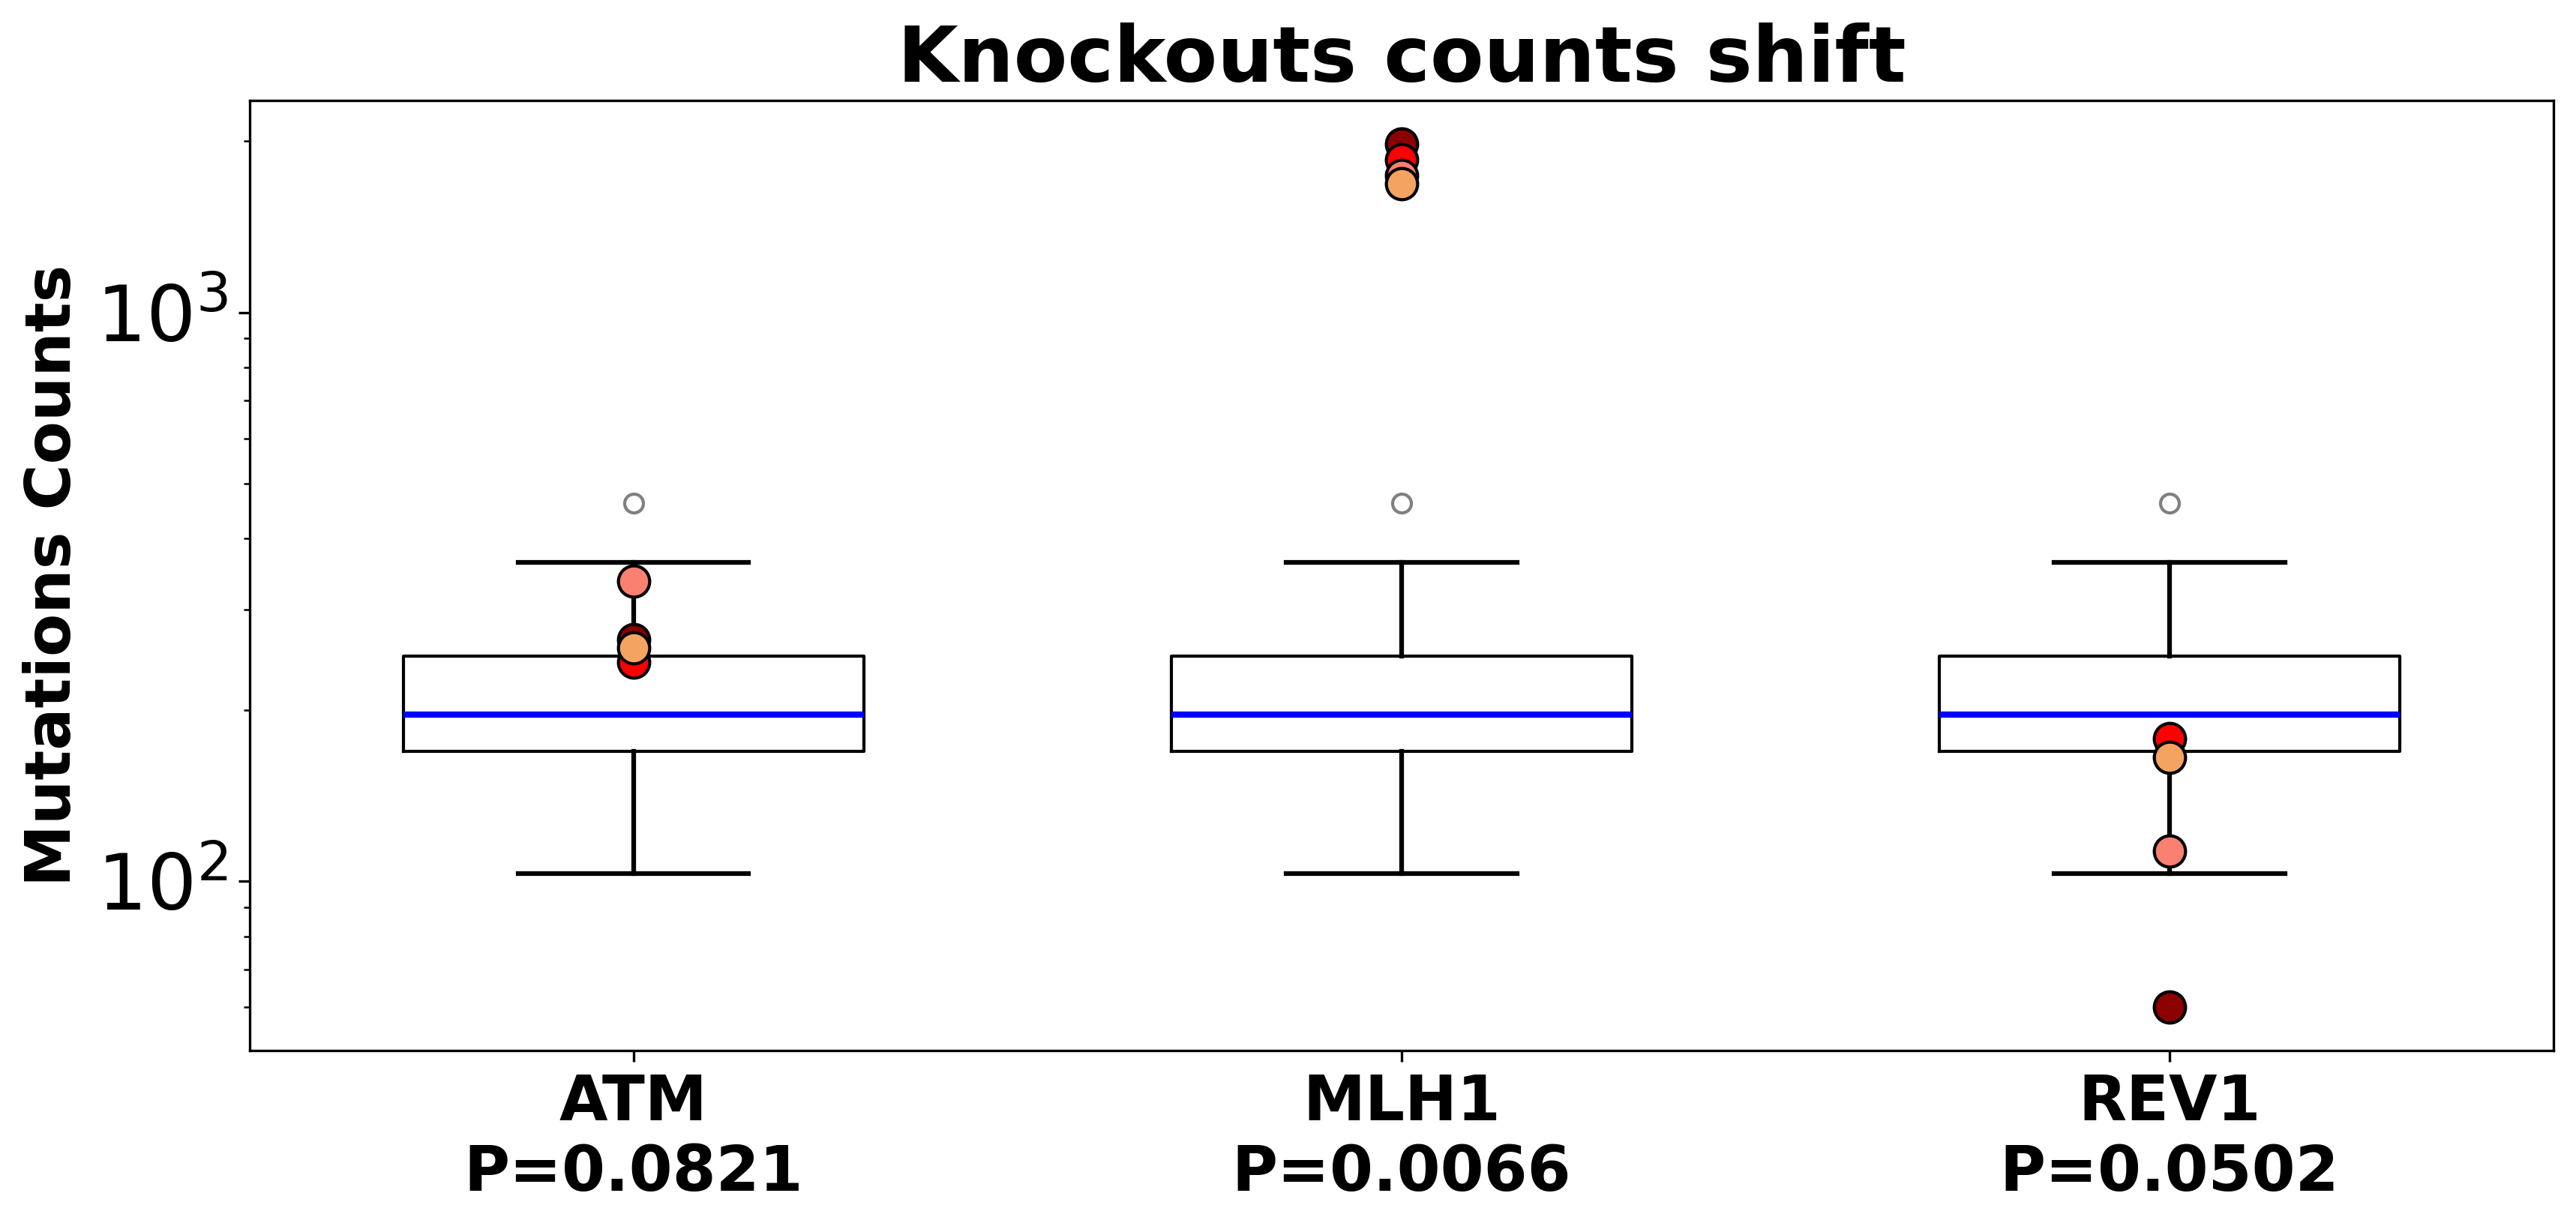

In [43]:
#boxplot of counts results
# Sample data
i1= [i for i, val in enumerate(exp_names) if val.startswith('ATM')] # indices of ATM ko
i2= [i for i, val in enumerate(exp_names) if val.startswith('MLH1')] # indices of MLH1 ko
i3= [i for i, val in enumerate(exp_names) if val.startswith('REV1')] # indices of REV1 ko

c_ko_1 = [all_exp_counts[i] for i in i1] # distance of ATM ko from the control normalized center
p_ko_1 = [all_u_p_adj[i] for i in i1] # corrected p-values of ATM ko
c_ko_2 = [all_exp_counts[i] for i in i2] # distance of MLH1 ko from the control normalized center
p_ko_2 = [all_u_p_adj[i] for i in i2] # corrected p-values of MLH1 ko
c_ko_3 = [all_exp_counts[i] for i in i3] # distance of REV1 ko from the control normalized center
p_ko_3 = [all_u_p_adj[i] for i in i3] # corrected p-values of REV1 ko


colors = ['darkred', 'red', 'salmon', 'sandybrown']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_1, colors)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_2, colors)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the early boxplot
plt.boxplot(all_new_control_counts, positions=[3], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(c_ko_3, colors)):
    plt.scatter(3, value, color=c, s=100, edgecolor='black', zorder=3)


# Customize x-axis
plt.xticks([1, 2, 3], [f'ATM\nP={gmean(p_ko_1):.4f}', f'MLH1\nP={gmean(p_ko_2):.4f}', f'REV1\nP={gmean(p_ko_3):.4f}'], fontsize=20, fontweight='bold')

# Add labels and legend
plt.yscale('log')
plt.ylabel('Mutations Counts', fontsize=20, fontweight='bold')
#plt.xlabel('Control bootstrapped data', fontsize=14, fontweight='bold')
plt.title('Knockouts counts shift', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

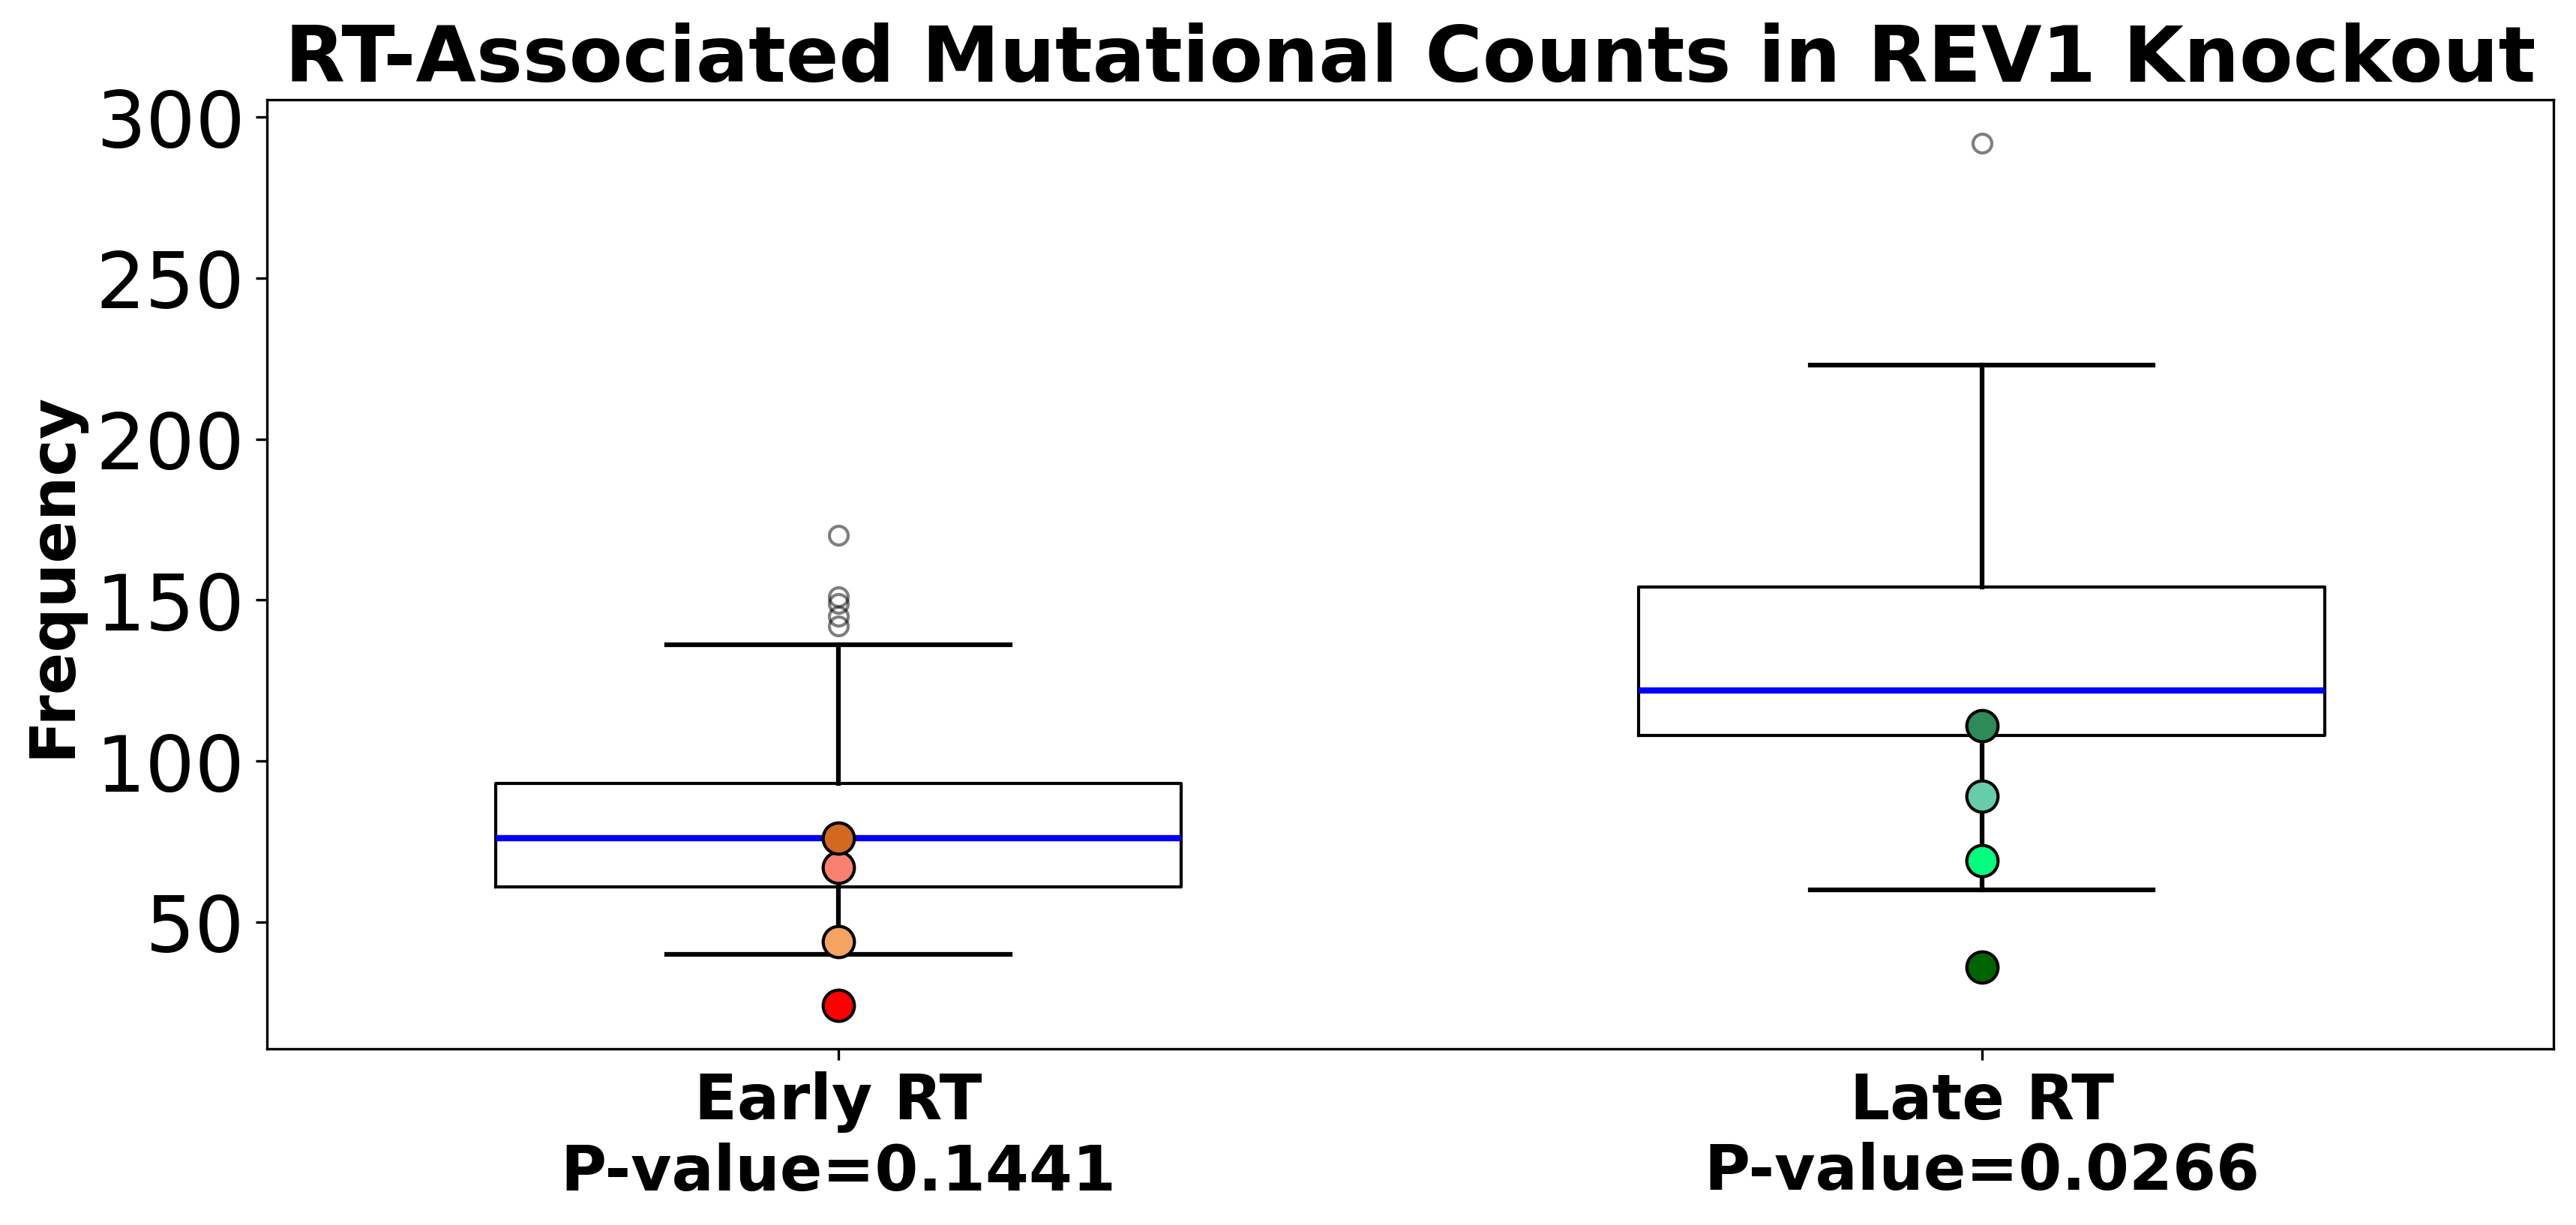

In [44]:
#boxplot of counts results - RT associated
#REV1
# Sample data
ind = [i for i, val in enumerate(exp_names) if val=='REV1'] # indices of MSH ko
counts_ko_early = [early_exp_counts[i] for i in ind] # early counts data of REV1
p_ko_early = early_u_p_adj[ind[0]] # early corrected p-value of REV1
counts_ko_late = [late_exp_counts[i] for i in ind] # late counts data of REV1
p_ko_late = late_u_p_adj[ind[0]] # late corrected p-value of REV1

colors_early = ['red', 'salmon', 'sandybrown', 'chocolate']
colors_late = ['darkgreen', 'seagreen', 'springgreen', 'mediumaquamarine']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(early_new_control_counts, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(counts_ko_early, colors_early)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the late boxplot
plt.boxplot(late_new_control_counts, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the late boxplot
for i, (value, c) in enumerate(zip(counts_ko_late, colors_late)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Customize x-axis
plt.xticks([1, 2], [f'Early RT\nP-value={p_ko_early:.4f}', f'Late RT\nP-value={p_ko_late:.4f}'], fontsize=20, fontweight='bold')


# Add labels and legend
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.title('RT-Associated Mutational Counts in REV1 Knockout', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

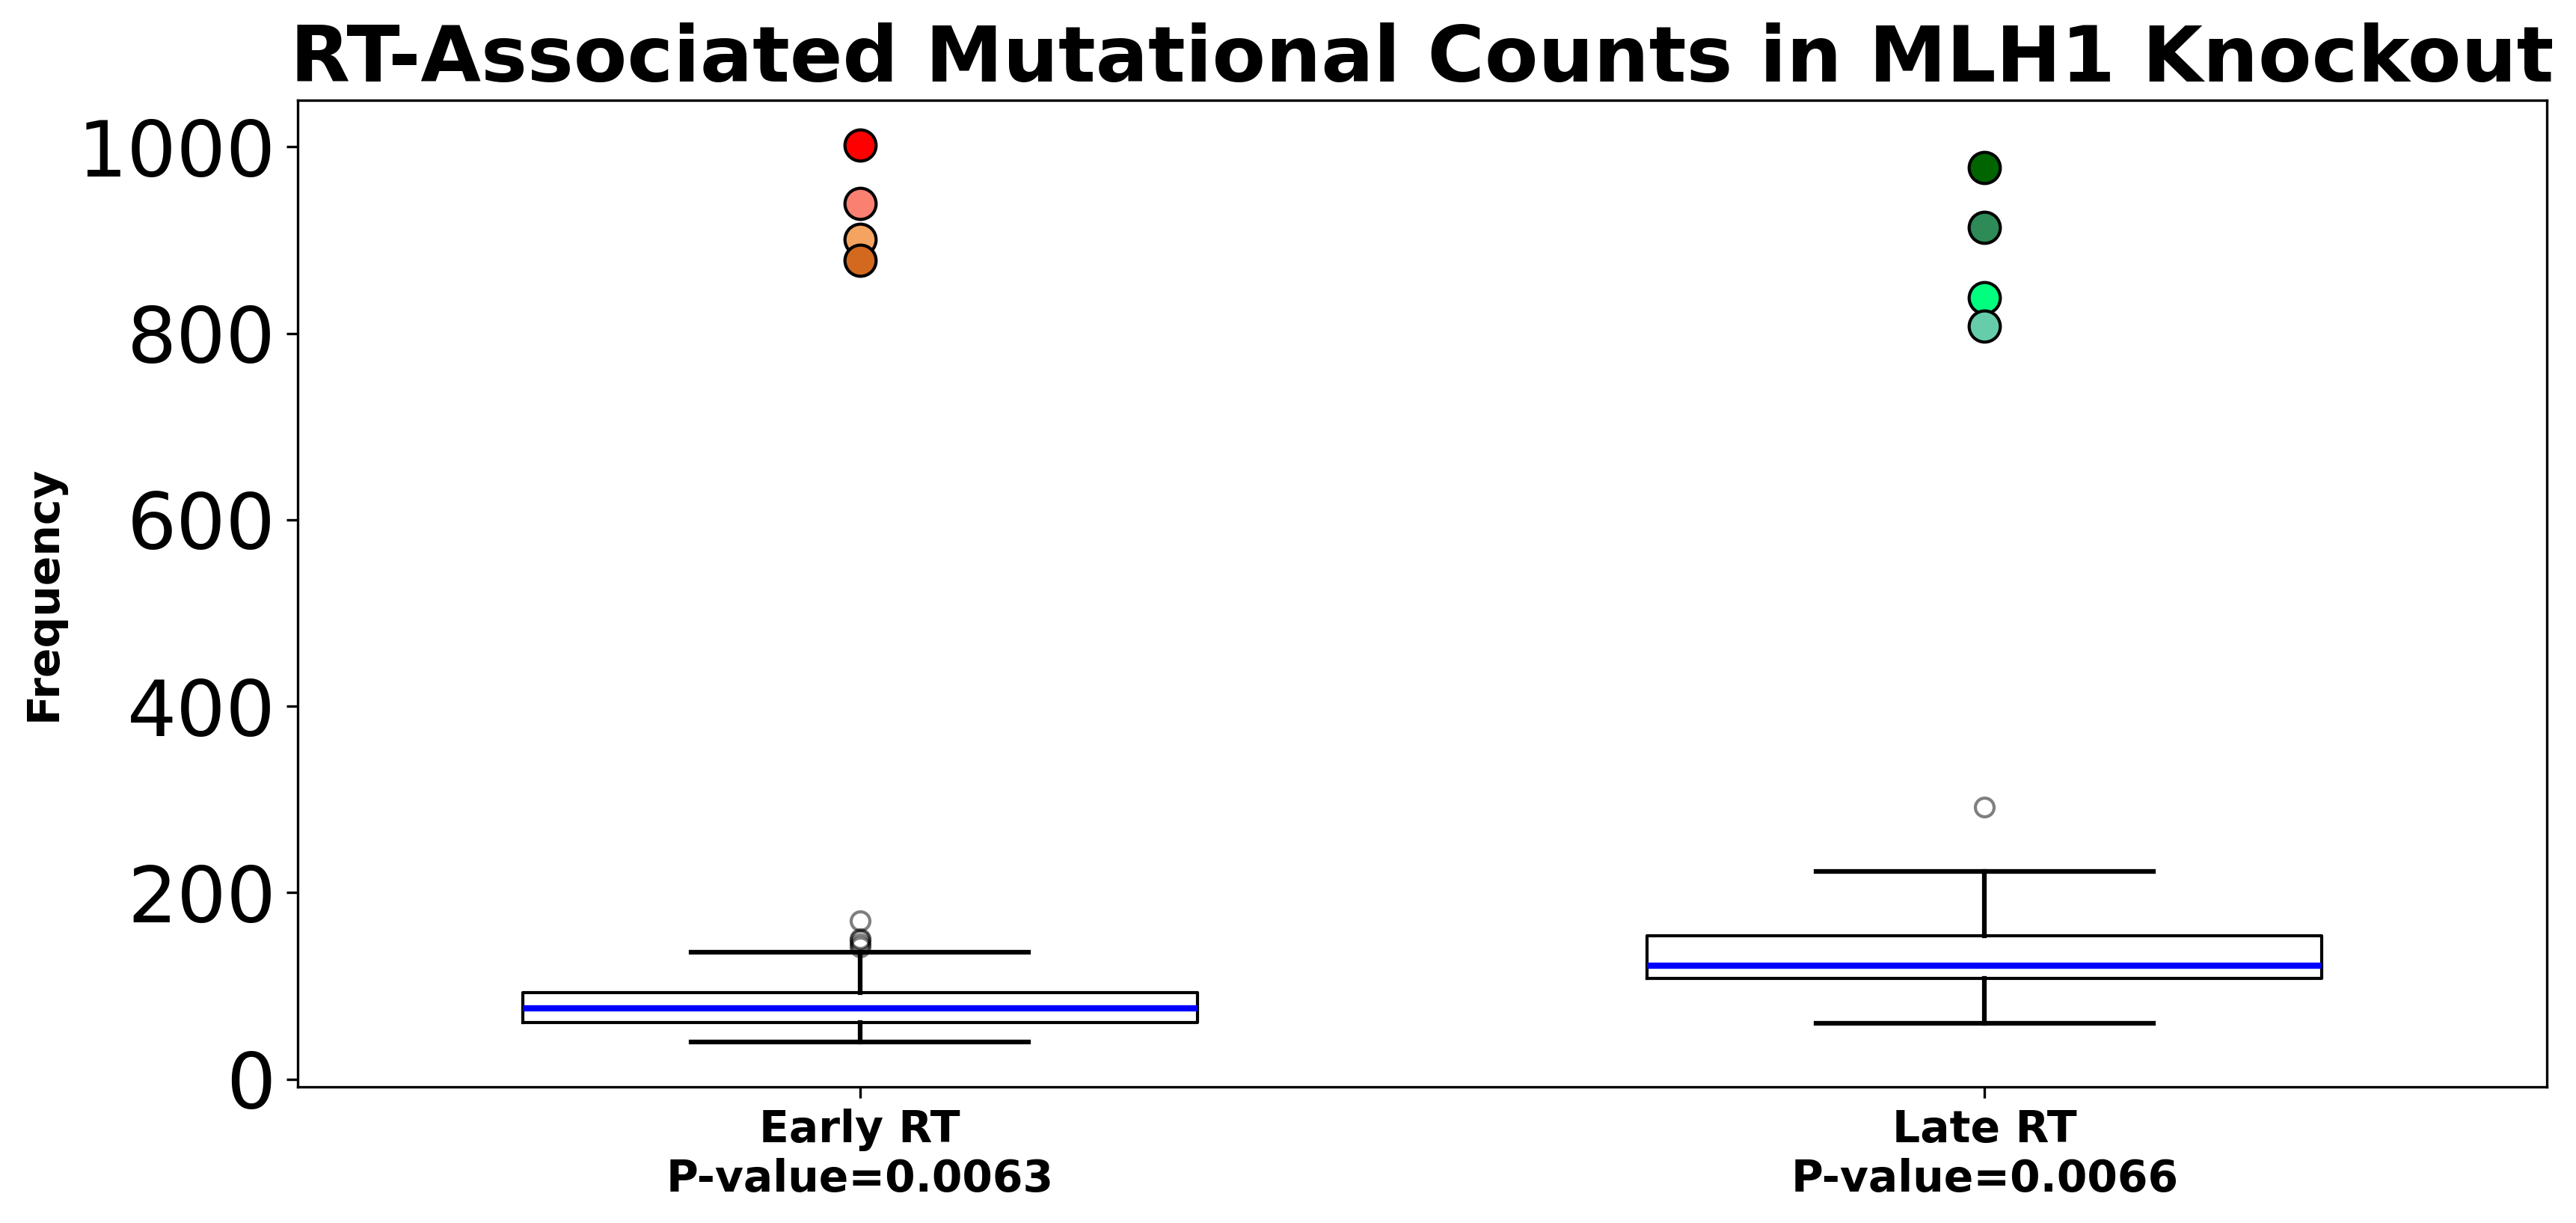

In [45]:
#boxplot of counts results - RT associated
#MLH1
# Sample data
ind = [i for i, val in enumerate(exp_names) if val=='MLH1'] # indices of MSH ko
counts_ko_early = [early_exp_counts[i] for i in ind] # early counts data of REV1
p_ko_early = early_u_p_adj[ind[0]] # early corrected p-value of REV1
counts_ko_late = [late_exp_counts[i] for i in ind] # late counts data of REV1
p_ko_late = late_u_p_adj[ind[0]] # late corrected p-value of REV1

colors_early = ['red', 'salmon', 'sandybrown', 'chocolate']
colors_late = ['darkgreen', 'seagreen', 'springgreen', 'mediumaquamarine']

# Create the boxplot
plt.figure(figsize=(12, 6), dpi=300)

# Create the early boxplot
plt.boxplot(early_new_control_counts, positions=[1], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the early boxplot
for i, (value, c) in enumerate(zip(counts_ko_early, colors_early)):
    plt.scatter(1, value, color=c, s=100, edgecolor='black', zorder=3)

# Create the late boxplot
plt.boxplot(late_new_control_counts, positions=[2], widths=0.6, vert=True, patch_artist=False,
            boxprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=1.5),
            capprops=dict(color='black', linewidth=1.5), flierprops=dict(marker='o', color='black', alpha=0.5),
            medianprops=dict(color='blue', linewidth=2))

# Highlight the specific values for the late boxplot
for i, (value, c) in enumerate(zip(counts_ko_late, colors_late)):
    plt.scatter(2, value, color=c, s=100, edgecolor='black', zorder=3)

# Customize x-axis
plt.xticks([1, 2], [f'Early RT\nP-value={p_ko_early:.4f}', f'Late RT\nP-value={p_ko_late:.4f}'], fontsize=14, fontweight='bold')


# Add labels and legend
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('RT-Associated Mutational Counts in MLH1 Knockout', fontsize=25, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

In [46]:
# Zip the lists together - create summary file
all_names = exp_names + control_names
data = zip(all_names, p_vals_all, p_adj_all, all_u_pvals, all_u_p_adj, p_vals_early, p_adj_early, early_u_pvals, early_u_p_adj, p_vals_late, p_adj_late, late_u_pvals, late_u_p_adj)

# Define the file name
file_name = 'crispr_sbs_statistics_2rt.csv'

# Write the data to a CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Name', 'ALL Spectrum P-value', 'ALL Spectrum P-corrected', 'ALL Burden P-value', 'ALL Burden P-corrected', 'EARLY Spectrum P-value', 'EARLY Spectrum P-corrected', 'EARLY Burden P-value', 'EARLY Burden P-corrected', 'LATE Spectrum P-value', 'LATE Spectrum P-corrected','LATE Burden P-value', 'LATE Burden P-corrected'])  # Write header
    writer.writerows(data)  # Write data rows

print(f"CSV file '{file_name}' has been created.")

CSV file 'crispr_sbs_statistics_2rt.csv' has been created.


In [47]:
# calculate geometric mean of each KO's replicates bootstrap results
name = exp_names_upd[0]
mut_all_geo = []
mut_early_geo = []
mut_late_geo = []
count_all = [all_u_p_adj[0]]
count_early = [early_u_p_adj[0]]
count_late = [late_u_p_adj[0]]

tmp_all = [p_adj_all[0]]
tmp_early = [p_adj_early[0]]
tmp_late = [p_adj_late[0]]

counter = 1
for n in exp_names[1:]:
  if n == name: #same ko
    tmp_all.append(p_adj_all[counter])
    tmp_early.append(p_adj_early[counter])
    tmp_late.append(p_adj_late[counter])
    counter = counter+1
  else: #new KO
    if n == 'EXO1' or n == 'MSH6':
      print(tmp_all, '\n', tmp_early, '\n', tmp_late)
    mut_all_geo.append(gmean(tmp_all))
    mut_early_geo.append(gmean(tmp_early))
    mut_late_geo.append(gmean(tmp_late))

    tmp_all = [p_adj_all[counter]]
    tmp_early = [p_adj_early[counter]]
    tmp_late = [p_adj_late[counter]]
    count_all.append(all_u_p_adj[counter])
    count_early.append(early_u_p_adj[counter])
    count_late.append(late_u_p_adj[counter])
    counter = counter+1
    name = n

#last KO
mut_all_geo.append(gmean(tmp_all))
mut_early_geo.append(gmean(tmp_early))
mut_late_geo.append(gmean(tmp_late))

print(len(mut_all_geo), len(mut_early_geo), len(mut_late_geo), len(count_all), len(count_early), len(count_late))

[np.float64(0.10618620689655173), np.float64(0.22233703703703703), np.float64(0.09376599999999999), np.float64(0.0019222222222222223)] 
 [np.float64(0.3022557142857143), np.float64(0.3872660550458716), np.float64(0.7914749999999999), np.float64(0.35882235294117654)] 
 [np.float64(0.08783076923076924), np.float64(0.08783076923076924), np.float64(0.003642105263157895), np.float64(0.0012357142857142857)]
[np.float64(0.0019222222222222223), np.float64(0.002731578947368421), np.float64(0.002731578947368421)] 
 [np.float64(0.3022557142857143), np.float64(0.3022557142857143), np.float64(0.3022557142857143)] 
 [np.float64(0.0012357142857142857), np.float64(0.006343333333333334), np.float64(0.0032437499999999997)]
42 42 42 42 42 42


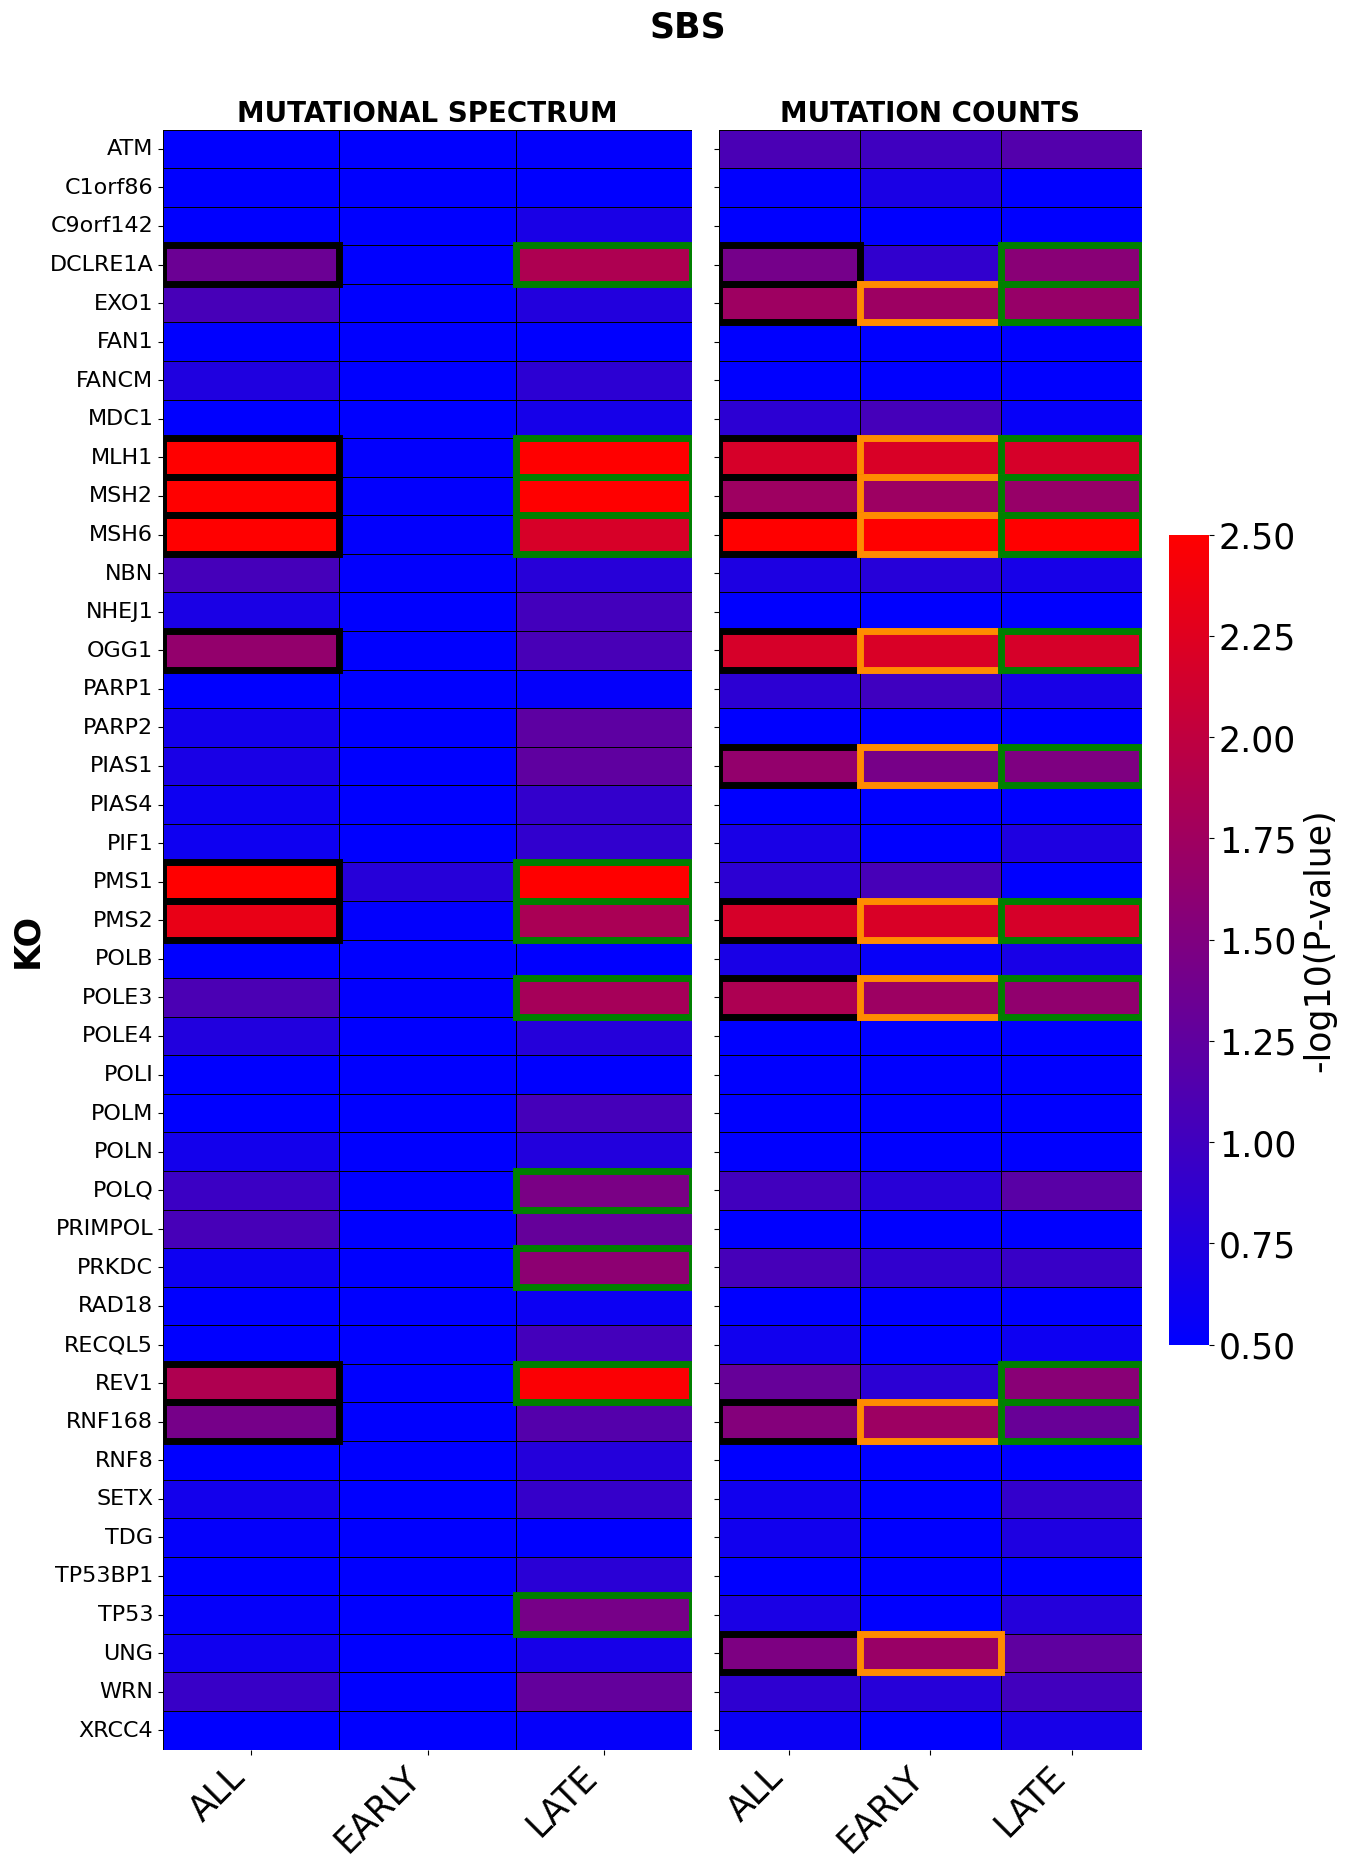

In [50]:
# Summary heatmap of spectrum & mutations burden results

# Create DataFrame
df = pd.DataFrame({
    'MUT ALL': mut_all_geo,
    'MUT EARLY': mut_early_geo,
    'MUT LATE': mut_late_geo,
    'COUNTS ALL': count_all,
    'COUNTS EARLY': count_early,
    'COUNTS LATE': count_late
}, index=exp_names_upd)

# Split into MUT and COUNTS dataframes
df_mut = df[['MUT ALL', 'MUT EARLY', 'MUT LATE']]
df_counts = df[['COUNTS ALL', 'COUNTS EARLY', 'COUNTS LATE']]
# Transform to -log10
df_mut_trans = -np.log10(df_mut.replace(0, 1e-10))
df_counts_trans = -np.log10(df_counts.replace(0, 1e-10))

threshold = 1.3

# Set up figure and gridspec
fig, axs = plt.subplots(1, 2, figsize=(14, 20), gridspec_kw={'width_ratios': [1, 1]}, sharey=True)

# Create custom blue-to-red colormap (no white in middle)
colors = ['blue', 'red']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue_red', colors)

vmin_val = 0.5
vmax_val = 2.5

# Plot heatmap 1: MUTATIONAL SPECTRUM
sns.heatmap(df_mut_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
            linewidths=0.5, annot=False, ax=axs[0], cbar=False, linecolor='black')

edge_colors = {
    0: 'black',   # MUT/COUNTS ALL
    1: 'darkorange',    # MUT/COUNTS EARLY
    2: 'green'   # MUT/COUNTS LATE
}

for y in range(df_mut_trans.shape[0]):
    for x in range(df_mut_trans.shape[1]):
        if df_mut_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')  # fallback to yellow if something unexpected
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=5)
            axs[0].add_patch(rect)

axs[0].set_title("MUTATIONAL SPECTRUM", fontsize=20, fontweight='bold')
axs[0].set_ylabel("KO", fontweight='bold')
axs[0].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
axs[0].tick_params(axis='y', labelsize=16)

# Plot heatmap 2: MUTATION COUNTS (with colorbar)
heatmap = sns.heatmap(df_counts_trans, cmap=custom_cmap, vmin=vmin_val, vmax=vmax_val,
                      linewidths=0.5, annot=False, ax=axs[1], cbar=True, linecolor='black',
                      cbar_kws={'label': '-log10(P-value)', 'shrink': 0.5})

for y in range(df_counts_trans.shape[0]):
    for x in range(df_counts_trans.shape[1]):
        if df_counts_trans.iloc[y, x] > threshold:
            color = edge_colors.get(x, 'yellow')
            rect = patches.Rectangle((x, y), 1, 1, fill=False, edgecolor=color, linewidth=5)
            axs[1].add_patch(rect)

axs[1].set_title("MUTATION COUNTS", fontsize=20, fontweight='bold')
axs[1].set_xticklabels(['ALL', 'EARLY', 'LATE'], rotation=45, ha='right')
axs[1].tick_params(axis='y', labelleft=False)

# Overall title
fig.suptitle("SBS", fontsize=25, fontweight='bold')

# Use tight layout *without warning*
fig.subplots_adjust(top=0.92, wspace=0.05)
plt.show()